# TP1 - EJ1 - Analisis Exploratorio

## Integrantes:

● Mejia Alan Roberto - 91161 \
● Prieto Pablo Alejandro - 91561 \
● Sosa Zoraida Flores - 87039

## Bibliotecas

In [1]:
import pandas as pd
import gc
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
%matplotlib inline

#Metricas para evaluar modelos
from sklearn import metrics

from IPython.display import Image
from IPython.display import HTML

## Importación de datasets

Realizamos la importación de los datos en formato parquet y los transformamos en dataframes de pandas.

In [2]:
trip_data_january = pd.read_parquet('data/yellow_tripdata_2023-01.parquet', engine="pyarrow")
trip_data_january.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
5,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,1,12.8,1.00,0.5,10.00,0.0,1.0,27.80,2.5,0.00
6,2,2023-01-01 00:09:22,2023-01-01 00:19:49,1.0,1.66,1.0,N,239,143,1,12.1,1.00,0.5,3.42,0.0,1.0,20.52,2.5,0.00
7,2,2023-01-01 00:27:12,2023-01-01 00:49:56,1.0,11.70,1.0,N,142,200,1,45.7,1.00,0.5,10.74,3.0,1.0,64.44,2.5,0.00
8,2,2023-01-01 00:21:44,2023-01-01 00:36:40,1.0,2.95,1.0,N,164,236,1,17.7,1.00,0.5,5.68,0.0,1.0,28.38,2.5,0.00
9,2,2023-01-01 00:39:42,2023-01-01 00:50:36,1.0,3.01,1.0,N,141,107,2,14.9,1.00,0.5,0.00,0.0,1.0,19.90,2.5,0.00


In [3]:
trip_data_february = pd.read_parquet('data/yellow_tripdata_2023-02.parquet', engine="pyarrow")
trip_data_february.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.00,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.0,-1.00,-0.5,0.00,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.0,1.00,0.5,0.00,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.00,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.30,0.0,1.0,25.30,2.5,0.00
5,1,2023-02-01 00:52:40,2023-02-01 01:07:18,1.0,5.10,1.0,N,148,236,1,21.9,3.50,0.5,5.35,0.0,1.0,32.25,2.5,0.00
6,1,2023-02-01 00:12:39,2023-02-01 00:40:36,1.0,8.90,1.0,N,137,244,1,41.5,3.50,0.5,3.50,0.0,1.0,50.00,2.5,0.00
7,1,2023-02-01 00:56:53,2023-02-01 01:00:37,1.0,1.20,1.0,N,263,141,1,7.2,3.50,0.5,2.44,0.0,1.0,14.64,2.5,0.00
8,2,2023-02-01 00:20:40,2023-02-01 00:33:56,1.0,7.49,1.0,N,48,243,1,30.3,1.00,0.5,8.82,0.0,1.0,44.12,2.5,0.00
9,2,2023-02-01 00:33:51,2023-02-01 00:37:34,1.0,0.51,1.0,N,114,211,1,5.8,1.00,0.5,1.62,0.0,1.0,12.42,2.5,0.00


In [4]:
trip_data_march = pd.read_parquet('data/yellow_tripdata_2023-03.parquet', engine="pyarrow")
trip_data_march.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2023-03-01 00:06:43,2023-03-01 00:16:43,1.0,0.00,1.0,N,238,42,2,8.6,1.0,0.5,0.00,0.0,1.0,11.10,0.0,0.00
1,2,2023-03-01 00:08:25,2023-03-01 00:39:30,2.0,12.40,1.0,N,138,231,1,52.7,6.0,0.5,12.54,0.0,1.0,76.49,2.5,1.25
2,1,2023-03-01 00:15:04,2023-03-01 00:29:26,0.0,3.30,1.0,N,140,186,1,18.4,3.5,0.5,4.65,0.0,1.0,28.05,2.5,0.00
3,1,2023-03-01 00:49:37,2023-03-01 01:01:05,1.0,2.90,1.0,N,140,43,1,15.6,3.5,0.5,4.10,0.0,1.0,24.70,2.5,0.00
4,2,2023-03-01 00:08:04,2023-03-01 00:11:06,1.0,1.23,1.0,N,79,137,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.00
5,1,2023-03-01 00:09:09,2023-03-01 00:17:34,1.0,1.20,1.0,N,162,137,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.00
6,1,2023-03-01 00:32:21,2023-03-01 00:42:08,1.0,1.80,1.0,N,170,48,1,12.1,3.5,0.5,3.40,0.0,1.0,20.50,2.5,0.00
7,1,2023-03-01 00:45:12,2023-03-01 00:52:37,1.0,2.00,1.0,N,48,164,2,10.7,3.5,0.5,0.00,0.0,1.0,15.70,2.5,0.00
8,1,2023-03-01 00:19:43,2023-03-01 00:39:37,1.0,5.30,1.0,N,113,61,1,26.1,3.5,0.5,9.30,0.0,1.0,40.40,2.5,0.00
9,2,2023-03-01 00:08:42,2023-03-01 00:18:45,1.0,2.27,1.0,N,239,263,1,13.5,1.0,0.5,3.70,0.0,1.0,22.20,2.5,0.00


Unificamos los 3 dataframes en 1 solo, trip_data y comenzamos el análisis exploratorio sobre el mismo.

In [5]:
trip_data = pd.concat([trip_data_january, trip_data_february, trip_data_march], axis=0).reset_index()
trip_data.head(10)

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,...,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,NaN
1,1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,...,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,NaN
2,2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,...,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,NaN
3,3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,...,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,NaN
4,4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,...,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,NaN
5,5,2,2023-01-01 00:50:34,2023-01-01 01:02:52,1.0,1.84,1.0,N,161,137,...,12.8,1.00,0.5,10.00,0.0,1.0,27.80,2.5,0.00,NaN
6,6,2,2023-01-01 00:09:22,2023-01-01 00:19:49,1.0,1.66,1.0,N,239,143,...,12.1,1.00,0.5,3.42,0.0,1.0,20.52,2.5,0.00,NaN
7,7,2,2023-01-01 00:27:12,2023-01-01 00:49:56,1.0,11.70,1.0,N,142,200,...,45.7,1.00,0.5,10.74,3.0,1.0,64.44,2.5,0.00,NaN
8,8,2,2023-01-01 00:21:44,2023-01-01 00:36:40,1.0,2.95,1.0,N,164,236,...,17.7,1.00,0.5,5.68,0.0,1.0,28.38,2.5,0.00,NaN
9,9,2,2023-01-01 00:39:42,2023-01-01 00:50:36,1.0,3.01,1.0,N,141,107,...,14.9,1.00,0.5,0.00,0.0,1.0,19.90,2.5,0.00,NaN


In [6]:
del trip_data_january
del trip_data_february
del trip_data_march
# Perform garbage collection
gc.collect()

0

## EJERCICIO 1 - Análisis Exploratorio de Datos

## a) Exploración Inicial

#### Tipo de variables

Análisis del tamaño del dataset, columnas distintas, tipo de variables, y valores únicos de cada columna.

In [7]:
trip_data_size = trip_data.shape
print("Cantidad de columnas: %d" % trip_data_size[1])
print("Cantidad de filas: %d" % trip_data_size[0])

Cantidad de columnas: 21
Cantidad de filas: 9384487


Nos fijamos si alguna fila está duplicada:

In [8]:
initial_size = len(trip_data)
dataset_no_duplicates = trip_data.drop_duplicates()
result_size = len(dataset_no_duplicates)
print(f'Cantidad: {initial_size-result_size} filas duplicadas')

Cantidad: 0 filas duplicadas


In [9]:
trip_data.describe()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
count,9.384487e+06,9.384487e+06,9384487,9384487,9.148308e+06,9.384487e+06,9.148308e+06,9.384487e+06,9.384487e+06,9.384487e+06,9.384487e+06,9.384487e+06,9.384487e+06,9.384487e+06,9.384487e+06,9.384487e+06,9.384487e+06,9.148308e+06,2.995023e+06,6.153285e+06
mean,1.570773e+06,1.728771e+00,2023-02-16 05:29:55.788239,2023-02-16 05:46:08.784656,1.355500e+00,3.874278e+00,1.548610e+00,1.660118e+02,1.642366e+02,1.188284e+00,1.851788e+01,1.577978e+00,4.878527e-01,3.419354e+00,5.338850e-01,9.814725e-01,2.726654e+01,2.278006e+00,1.074086e-01,1.006826e-01
min,0.000000e+00,1.000000e+00,2001-01-01 00:06:49,2001-01-01 14:13:51,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.599000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-7.330000e+01,-1.000000e+00,-9.829500e+02,-2.500000e+00,-1.250000e+00,-1.250000e+00
25%,7.820400e+05,1.000000e+00,2023-01-24 23:33:22,2023-01-24 23:48:47.500000,1.000000e+00,1.060000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.550000e+01,2.500000e+00,0.000000e+00,0.000000e+00
50%,1.564081e+06,2.000000e+00,2023-02-16 14:58:37,2023-02-16 15:17:08,1.000000e+00,1.790000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.800000e+00,0.000000e+00,1.000000e+00,2.030000e+01,2.500000e+00,0.000000e+00,0.000000e+00
75%,2.346121e+06,2.000000e+00,2023-03-10 14:34:35.500000,2023-03-10 14:54:20,1.000000e+00,3.330000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.050000e+01,2.500000e+00,5.000000e-01,4.250000e+00,0.000000e+00,1.000000e+00,2.904000e+01,2.500000e+00,0.000000e+00,0.000000e+00
max,3.403765e+06,6.000000e+00,2023-04-05 20:17:42,2023-04-05 20:35:28,9.000000e+00,3.350043e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,2.203100e+03,2.080000e+01,5.316000e+01,9.843000e+02,1.969900e+02,1.000000e+00,2.208100e+03,2.750000e+00,1.250000e+00,1.250000e+00
std,9.147277e+05,4.520314e-01,NaN,NaN,8.903758e-01,2.367626e+02,6.855882e+00,6.402818e+01,6.978675e+01,5.310003e-01,1.787964e+01,1.810455e+00,1.020753e-01,3.893056e+00,2.058199e+00,1.867307e-01,2.232619e+01,7.694737e-01,3.556511e-01,3.450905e-01


In [10]:
trip_data.columns

Index(['index', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee'],
      dtype='object')

In [11]:
trip_data.dtypes

index                             int64
VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
Airport_fee                     float64
dtype: object

In [12]:
trip_data.isna().sum()

index                          0
VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count           236179
trip_distance                  0
RatecodeID                236179
store_and_fwd_flag        236179
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge      236179
airport_fee              6389464
Airport_fee              3231202
dtype: int64

### Variables Cualitativas y Cuantitativas 

* Las variables **cualitativas** son aquellas que describen características o cualidades y no pueden ser medidas en términos numéricos. 
* Las variables **cuantitativas** son aquellas que pueden ser medidas en términos numéricos y tienen valores numéricos.

Variables Independientes:
* Cualitativas (categoricas):
  * Texto
    * Nominales
    * Ordinales
  * Númerica
    * Nominales
    * Ordinales
* Cuantitativas (numericas):
  * Discreta
  * Continua



#### Variables Cualitativas

Las variables cualitativas del dataset son: VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, store_and_fwd_flag, RatecodeID, PULocationID, DOLocationID y payment_type.

Para los features de datetime de hora de salida y llegada del viaje vamos a analizar cuáles son los días más frencuentes (teniendo en cuenta que los días serían distintos sólamente en los límites y dependiente de la duración del viaje.

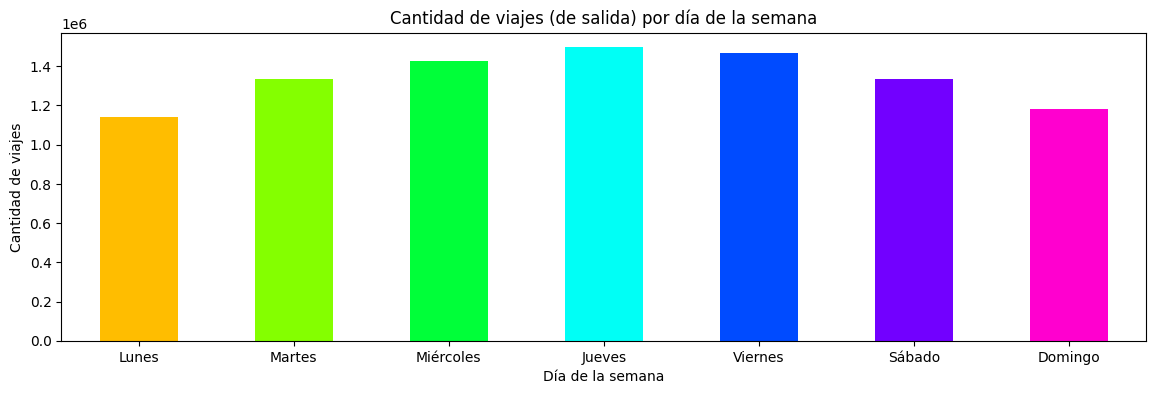

In [13]:
tpep_pickup_days = trip_data.loc[:,['VendorID', 'tpep_pickup_datetime']]

tpep_pickup_days['weekday'] = tpep_pickup_days['tpep_pickup_datetime'].dt.day_name()
tpep_pickup_days['dayofweek'] = tpep_pickup_days['tpep_pickup_datetime'].dt.dayofweek
tpep_pickup_days_groupby = tpep_pickup_days.groupby(['dayofweek','weekday']).count()['tpep_pickup_datetime'].reset_index()
tpep_pickup_days_groupby.set_index('weekday', inplace=True)
tpep_pickup_days_groupby.drop('dayofweek', inplace=True, axis=1)
tpep_pickup_days_groupby.index.name = None
tpep_pickup_days_groupby.rename({
    'Monday' : 'Lunes',
    'Tuesday' : 'Martes',
    'Wednesday' : 'Miércoles',
    'Thursday' : 'Jueves',
    'Friday' : 'Viernes',
    'Saturday' : 'Sábado',
    'Sunday' : 'Domingo'
}, axis=0, inplace=True)

plot_tpep_pickup_days = tpep_pickup_days_groupby.plot(y='tpep_pickup_datetime', title = "Cantidad de viajes (de salida) por día de la semana",kind='bar',
                                                          figsize=(14,4),rot=0, color=(sns.color_palette("hsv", n_colors=7)))
plot_tpep_pickup_days.set_ylabel('Cantidad de viajes')
plot_tpep_pickup_days.set_xlabel('Día de la semana')
plot_tpep_pickup_days.legend().set_visible(False)
plt.show()

In [14]:
del tpep_pickup_days
del tpep_pickup_days_groupby
del plot_tpep_pickup_days
# Perform garbage collection
gc.collect()

3644

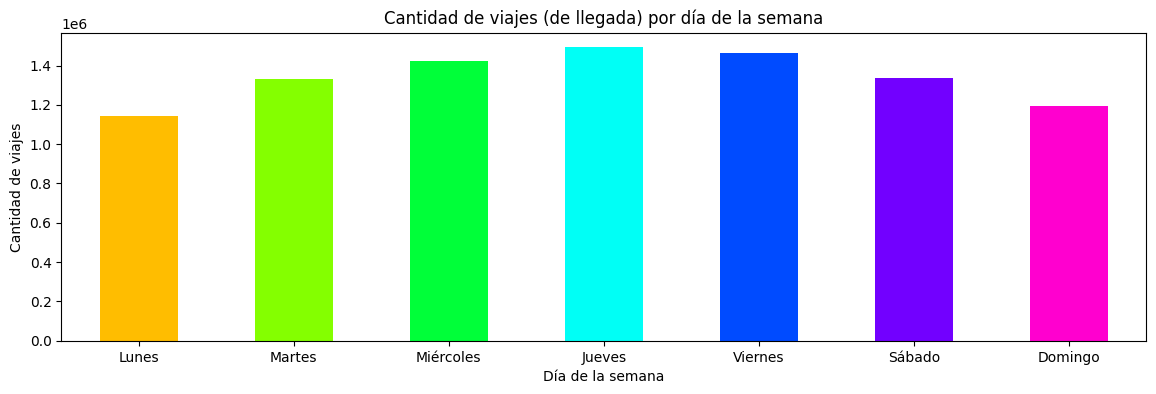

In [15]:
tpep_dropoff_days = trip_data.loc[:,['VendorID', 'tpep_dropoff_datetime']]

tpep_dropoff_days['weekday'] = tpep_dropoff_days['tpep_dropoff_datetime'].dt.day_name()
tpep_dropoff_days['dayofweek'] = tpep_dropoff_days['tpep_dropoff_datetime'].dt.dayofweek
tpep_dropoff_days_groupby = tpep_dropoff_days.groupby(['dayofweek','weekday']).count()['tpep_dropoff_datetime'].reset_index()
tpep_dropoff_days_groupby.set_index('weekday', inplace=True)
tpep_dropoff_days_groupby.drop('dayofweek', inplace=True, axis=1)
tpep_dropoff_days_groupby.index.name = None
tpep_dropoff_days_groupby.rename({
    'Monday' : 'Lunes',
    'Tuesday' : 'Martes',
    'Wednesday' : 'Miércoles',
    'Thursday' : 'Jueves',
    'Friday' : 'Viernes',
    'Saturday' : 'Sábado',
    'Sunday' : 'Domingo'
}, axis=0, inplace=True)

plot_tpep_dropoff_days = tpep_dropoff_days_groupby.plot(y='tpep_dropoff_datetime', title = "Cantidad de viajes (de llegada) por día de la semana",kind='bar',
                                                          figsize=(14,4),rot=0, color=(sns.color_palette("hsv", n_colors=7)))
plot_tpep_dropoff_days.set_ylabel('Cantidad de viajes')
plot_tpep_dropoff_days.set_xlabel('Día de la semana')
plot_tpep_dropoff_days.legend().set_visible(False)
plt.show()

In [16]:
del tpep_dropoff_days
del tpep_dropoff_days_groupby
del plot_tpep_dropoff_days
# Perform garbage collection
gc.collect()

3895

No se llega a apreciar diferencias entre los días de salida y llegada de los viajes por día de semana. Lo que si podemos notar que el día donde hay más viajes es el Jueves seguido por el Viernes y Miércoles respectivamente.

Vamos a analizar si realmente hay viajes donde los días de salida y llegada sean distintos.

In [17]:
tpep_dropoff_days_diff = trip_data.loc[trip_data.tpep_pickup_datetime.dt.day_name() != trip_data.tpep_pickup_datetime.dt.day_name(), 'VendorID']
tpep_dropoff_days_diff.count()

np.int64(0)

In [18]:
del tpep_dropoff_days_diff
# Perform garbage collection
gc.collect()

0

Por lo tanto, no hay viajes que inicien y terminen en distintos días. Así que creamos 2 features nuevos para el día de la semana, weekday y dayofweek.

In [19]:
trip_data['weekday'] = trip_data['tpep_pickup_datetime'].dt.day_name()
trip_data['dayofweek'] = trip_data['tpep_pickup_datetime'].dt.dayofweek
trip_data.weekday = trip_data.weekday.apply(lambda x: 'Lunes' if x == 'Monday' else 
                                                     ('Martes' if x == 'Tuesday' else ('Miércoles' if x == 'Wednesday' else 
                                                                ('Jueves' if x == 'Thursday' else ('Viernes' if x == 'Friday' else 
                                                                        ('Sábado' if x == 'Saturday' else 
                                                                            ('Domingo' if x == 'Sunday' else x)))))))

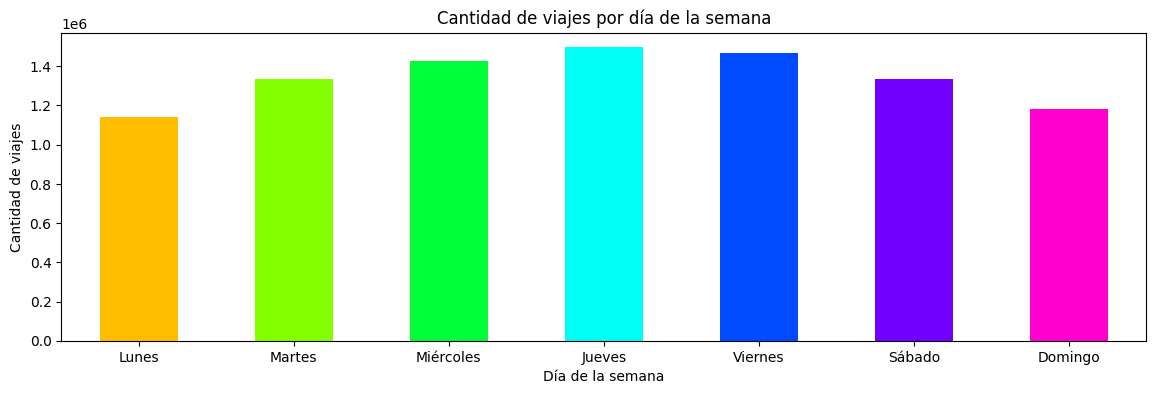

In [20]:
trip_data_days = trip_data.loc[:,['tpep_pickup_datetime', 'dayofweek', 'weekday']]

trip_data_days_groupby = trip_data_days.groupby(['dayofweek','weekday']).count()['tpep_pickup_datetime'].reset_index()
trip_data_days_groupby.set_index('weekday', inplace=True)
trip_data_days_groupby.drop('dayofweek', inplace=True, axis=1)
trip_data_days_groupby.index.name = None

plot_trip_data_days = trip_data_days_groupby.plot(y='tpep_pickup_datetime', title = "Cantidad de viajes por día de la semana",kind='bar',
                                                          figsize=(14,4),rot=0, color=(sns.color_palette("hsv", n_colors=7)))
plot_trip_data_days.set_ylabel('Cantidad de viajes')
plot_trip_data_days.set_xlabel('Día de la semana')
plot_trip_data_days.legend().set_visible(False)
plt.show()

In [21]:
del trip_data_days
del trip_data_days_groupby
del plot_trip_data_days
# Perform garbage collection
gc.collect()

3877

In [22]:
trip_data.store_and_fwd_flag.unique()

array(['N', 'Y', None], dtype=object)

Análizamos el feature store_and_fwd_flag ("almacenar y reenviar"): indica si el registro del viaje se mantuvo en la memoria del vehículo
antes de enviarlo al proveedor, porque el vehículo no tenía una conexión con el servidor.

Y = almacenar y reenviar viaje  / 
N = no es un viaje de almacenamiento y reenvío

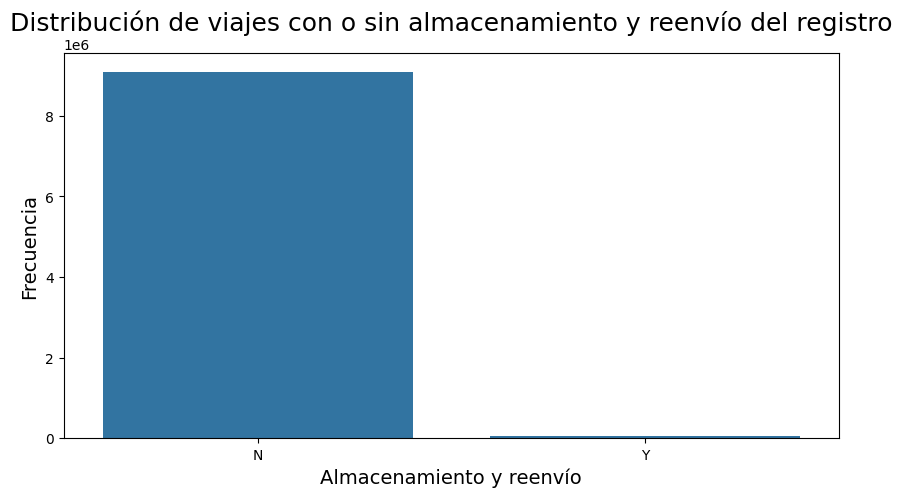

In [23]:
# Graficamos la frecuencia de los únicos 2 valores (sin considerar los NaN)
plt.figure(figsize=(10,5))
store_and_fwd_flag_plt = sns.countplot(x='store_and_fwd_flag', data=trip_data)
store_and_fwd_flag_plt.set_title('Distribución de viajes con o sin almacenamiento y reenvío del registro', size=18)
store_and_fwd_flag_plt.set_ylabel('Frecuencia', size=14)
store_and_fwd_flag_plt.set_xlabel('Almacenamiento y reenvío', size=14)
plt.show()

In [24]:
store_and_fwd_flag_N = trip_data.loc[trip_data.store_and_fwd_flag == 'N', 'store_and_fwd_flag']
store_and_fwd_flag_N.count()

np.int64(9095120)

In [25]:
store_and_fwd_flag_Y = trip_data.loc[trip_data.store_and_fwd_flag == 'Y', 'store_and_fwd_flag']
store_and_fwd_flag_Y.count()

np.int64(53188)

In [26]:
del store_and_fwd_flag_plt
del store_and_fwd_flag_N
del store_and_fwd_flag_Y
# Perform garbage collection
gc.collect()

152

Hay una diferencia enorme entre ambas, donde la moyoría de los viajes no tuvo que almacenar y reenviar el registro, ya que tuvieron conexión con el servidor.

Ahora Análizamos el feature payment_type, el tipo de pago de los viaje.

0= Tarjeta de crédito
1= Efectivo
2= Sin cargo
3= Disputa
4= Desconocido
5= Viaje anulado

In [27]:
trip_data.payment_type.unique()

array([2, 1, 4, 3, 0, 5])

Creamos un feature de tipo object payment_type_name y le asignamos su descripción correspondiente.

In [28]:
trip_data['payment_type_name'] = trip_data['payment_type'].astype('object')
trip_data.payment_type_name.dtypes

dtype('O')

In [29]:
trip_data.payment_type_name = trip_data.payment_type.apply(lambda x: 'Tarjeta de crédito' if x == 0 else 
                                                         ('Efectivo' if x == 1 else ('Sin cargo' if x == 2 else 
                                                                ('Disputa' if x == 3 else ('Desconocido' if x == 4 else 
                                                                        ('Viaje anulado' if x == 5 else x))))))

In [30]:
trip_data.payment_type_name.unique()

array(['Sin cargo', 'Efectivo', 'Desconocido', 'Disputa',
       'Tarjeta de crédito', 'Viaje anulado'], dtype=object)

/tmp/ipykernel_125994/3942775074.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  payment_type_plt = sns.countplot(x='payment_type_name', data=trip_data, palette=(sns.color_palette("hsv", n_colors=5)))
/tmp/ipykernel_125994/3942775074.py:3: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  payment_type_plt = sns.countplot(x='payment_type_name', data=trip_data, palette=(sns.color_palette("hsv", n_colors=5)))


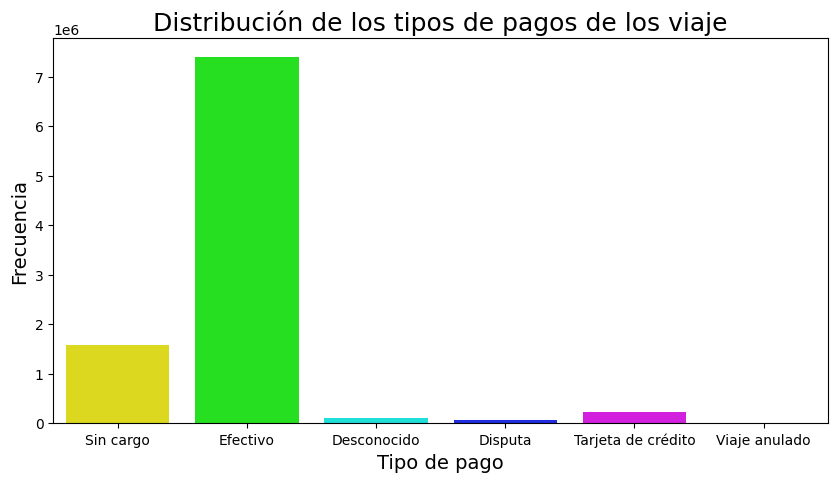

In [31]:
# Graficamos la frecuencia de los 5 tipos de pagos
plt.figure(figsize=(10,5))
payment_type_plt = sns.countplot(x='payment_type_name', data=trip_data, palette=(sns.color_palette("hsv", n_colors=5)))
payment_type_plt.set_title('Distribución de los tipos de pagos de los viaje', size=18)
payment_type_plt.set_ylabel('Frecuencia', size=14)
payment_type_plt.set_xlabel('Tipo de pago', size=14)
plt.show()

In [32]:
del payment_type_plt
# Perform garbage collection
gc.collect()

2428

Claramente el tipo de pago más utilizado es el Efectivo.

Para los features de tipo IDs (VendorID, RatecodeID, PULocationID y DOLocationID) vamos a analizar cuáles son los id de cada uno y sus cantidad de viajes.

VendorID: Un código que indica el proveedor de TPEP que proporcionó el registro.

1= Creative Mobile Technologies, LLC. 
2= VeriFone Inc.

In [33]:
trip_data.VendorID.unique()

array([2, 1, 6])

Creamos un feature de tipo object vendor_description y le asignamos su descripción correspondiente (El ID = 6 al parecer es un dato mal cargado y por ahora lo mantenemos).

In [34]:
trip_data['vendor_description'] = trip_data['VendorID'].astype('object')
trip_data.vendor_description.dtypes

dtype('O')

In [35]:
trip_data.vendor_description = trip_data.VendorID.apply(lambda x: 'Creative Mobile Technologies, LLC.' if x == 1 else 
                                                         ('VeriFone Inc.' if x == 2 else x))

In [36]:
trip_data.vendor_description.unique()

array(['VeriFone Inc.', 'Creative Mobile Technologies, LLC.', 6],
      dtype=object)

RatecodeID: Código de tarifa final vigente al final del viaje.

1= Tarifa estándar
2=JFK
3=Newark
4=Nassau o Westchester
5=Tarifa negociada
6=Viaje en grupo

In [37]:
trip_data.RatecodeID.unique()

array([ 1.,  2.,  4., 99.,  5.,  3.,  6., nan])

También creamos el feature de tipo object ratecode_description y le asignamos su descripción correspondiente (El ID = 99 al parecer es un dato mal cargado y por ahora lo mantenemos).

In [38]:
trip_data['ratecode_description'] = trip_data['RatecodeID'].astype('object')
trip_data.ratecode_description.dtypes

dtype('O')

In [39]:
trip_data.ratecode_description = trip_data.RatecodeID.apply(lambda x: 'Tarifa estándar' if x == 1 else 
                                                         ('JFK' if x == 2 else ('Newark' if x == 3 else 
                                                                ('Nassau o Westchester' if x == 4 else ('Tarifa negociada' if x == 5 else 
                                                                        ('Viaje en grupo' if x == 6 else x))))))

In [40]:
trip_data.ratecode_description.unique()

array(['Tarifa estándar', 'JFK', 'Nassau o Westchester', 99.0,
       'Tarifa negociada', 'Newark', 'Viaje en grupo', nan], dtype=object)

In [41]:
trip_data.PULocationID.unique()

array([161,  43,  48, 138, 107, 239, 142, 164, 141, 234,  79,  33,  90,
       113, 237, 143, 137, 132, 163,  68, 263, 170, 233, 236, 144, 229,
       249, 162, 224, 151, 211, 148, 238, 231,  13, 262,  75, 264, 125,
       186, 158, 246,  50,   4,  87, 114,  24, 166,  41,  25, 194,  74,
       140, 146,  65, 181, 255, 256,  88, 232, 193, 226,  97, 197,  37,
       189, 261, 225, 244,  45,  40, 116,  80, 209, 243,  60, 265, 100,
        70, 188,  52,   7, 159,  66,  42, 174, 215, 252, 136, 223,  93,
        12,  39, 122, 195,  61, 112, 230,  82, 106, 228, 179, 260, 152,
       121,  49, 198,  83,  17, 168,  56, 119, 145, 129,  36,   1,  95,
        34, 160, 196,  10, 102, 247,  86,  28,  54,  77, 240,  32, 218,
       219, 133,  89, 156, 177,  85, 173,  69,  14,  51, 202, 165, 254,
       235, 127, 131, 191, 157, 130, 182, 241,  11,  62, 258, 169, 123,
        47,   6,  22, 135, 216, 155,  63,  91,  94, 108,  92,  44, 259,
       124,  78, 171, 149,  55, 180,  35,  81, 257, 139,  72,  7

In [42]:
trip_data.DOLocationID.unique()

array([141, 237, 238,   7,  79, 137, 143, 200, 236, 107,  68, 264,  33,
        61, 186,  48, 255, 239, 229, 116, 161, 164,  87, 232, 262,  75,
        36, 263, 140, 246, 231, 170,  43, 233,   4, 162, 224, 145, 125,
        24, 265, 163, 114, 225, 211, 158,  42, 151, 261, 148,  13,  50,
       133, 188, 149,  95, 218, 234, 228, 212, 144, 166, 112,  90, 249,
        25,  97, 113,  45,  91, 142,  88, 256, 243,  41, 193, 181, 257,
        94,  80, 195,  10, 194, 167, 127, 248,  89,  74, 223,  47,  40,
       202, 216, 129, 244,  17, 121,  39,  83,  82, 198, 136,  65, 171,
       196, 209,  37, 146, 191, 152, 226, 100, 197,  22, 179, 160, 235,
       168,  29, 260,  35, 189,  92, 130, 165, 132,  63, 252, 119, 185,
        67, 258,  76,  57, 138, 242, 126, 117,  54, 123, 213, 207,  49,
        18,  19, 219,  71, 177, 208,   3, 203, 147,   9,  14, 251, 169,
        52, 153,  53, 106,  70, 122, 254, 205,  62, 155, 247, 220, 124,
        56, 259, 157,  15, 217,  77, 128, 174, 215,  64,  38,  5

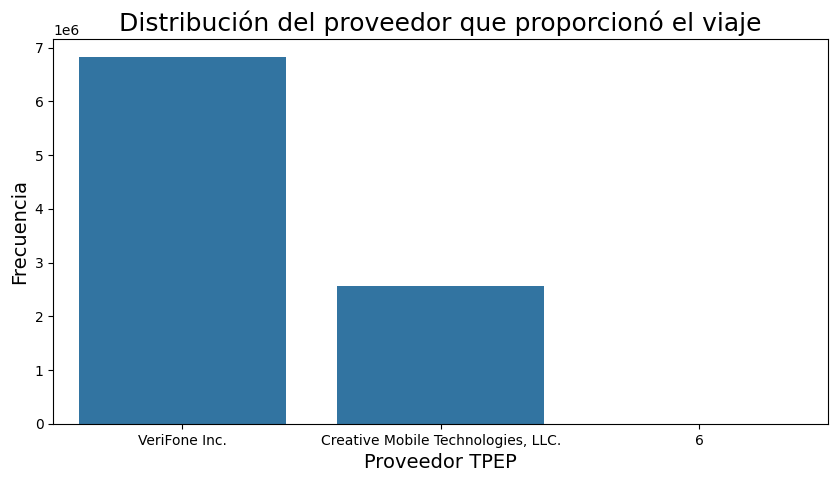

In [43]:
# Graficamos la distribucion de la variable vendor_description
plt.figure(figsize=(10,5))
VendorID_count_plt = sns.countplot(x='vendor_description', data=trip_data)
VendorID_count_plt.set_title('Distribución del proveedor que proporcionó el viaje', size=18)
VendorID_count_plt.set_ylabel('Frecuencia', size=14)
VendorID_count_plt.set_xlabel('Proveedor TPEP', size=14)
plt.show()

In [44]:
del VendorID_count_plt
# Perform garbage collection
gc.collect()

3299

La mayoría de los viajes lo proporcionó el ID VeriFone Inc.

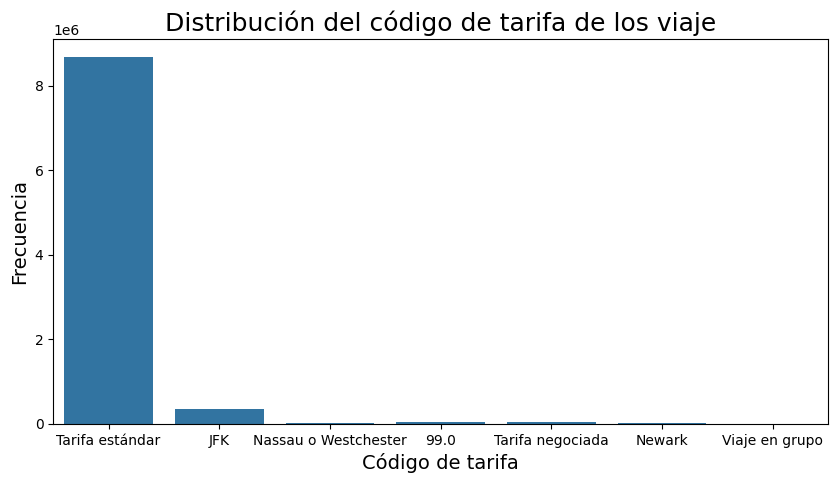

In [45]:
# Graficamos la distribucion de la variable ratecode_description
plt.figure(figsize=(10,5))
RatecodeID_count_plt = sns.countplot(x='ratecode_description', data=trip_data)
RatecodeID_count_plt.set_title('Distribución del código de tarifa de los viaje', size=18)
RatecodeID_count_plt.set_ylabel('Frecuencia', size=14)
RatecodeID_count_plt.set_xlabel('Código de tarifa', size=14)
plt.show()

In [46]:
del RatecodeID_count_plt
# Perform garbage collection
gc.collect()

2818

En la mayoría de los viajes se utilizó la tarifa ID Tarifa estándar.

In [47]:
# # Graficamos la distribucion de la variable PULocationID
# plt.figure(figsize=(10,5))
# PULocationID_count_plt = sns.countplot(x='PULocationID', data=trip_data)
# PULocationID_count_plt.set_title('Distribución de los ID de la ubicación de salida', size=18)
# PULocationID_count_plt.set_ylabel('Frecuencia', size=14)
# PULocationID_count_plt.set_xlabel('ID de la ubicación de salida', size=14)
# plt.show()

In [48]:
# # Graficamos la distribucion de la variable DOLocationID
# plt.figure(figsize=(10,5))
# DOLocationID_count_plt = sns.countplot(x='DOLocationID', data=trip_data)
# DOLocationID_count_plt.set_title('Distribución de los ID de la ubicación de llegada', size=18)
# DOLocationID_count_plt.set_ylabel('Frecuencia', size=14)
# DOLocationID_count_plt.set_xlabel('ID de la ubicación de llegada', size=14)
# plt.show()

#### Variables Cuantitativas 

Las variables cuantitativas del dataset son: passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, total_amount, congestion_surcharge, airport_fee y Airport_fee.

Empezamos analizando el feature de cantidad de pasajeros

In [49]:
trip_data.passenger_count.describe()

count    9.148308e+06
mean     1.355500e+00
std      8.903758e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

In [50]:
trip_data.passenger_count.unique()

array([ 1.,  0.,  4.,  2.,  3.,  5.,  6.,  8.,  7.,  9., nan])

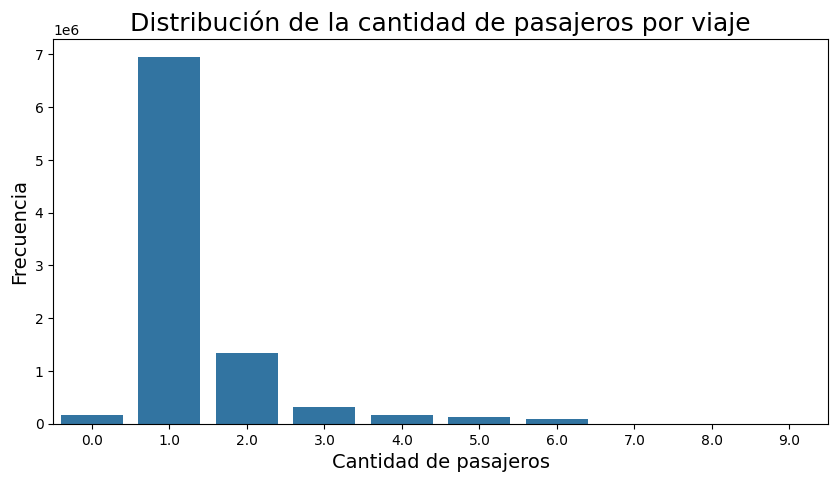

In [51]:
# Graficamos la distribucion de la variable passenger_count
plt.figure(figsize=(10,5))
RatecodeID_count_plt = sns.countplot(x='passenger_count', data=trip_data)
RatecodeID_count_plt.set_title('Distribución de la cantidad de pasajeros por viaje', size=18)
RatecodeID_count_plt.set_ylabel('Frecuencia', size=14)
RatecodeID_count_plt.set_xlabel('Cantidad de pasajeros', size=14)
plt.show()

Por lo tanto, el valor promedio es 1 pasajero por viaje (cuártil 1, 2 y 3 también), la mínima 0 y la máxima 9.

Ahora analizamos la distancia recorrida de los viajes, trip_distance.

In [52]:
trip_data.trip_distance.describe()

count    9.384487e+06
mean     3.874278e+00
std      2.367626e+02
min      0.000000e+00
25%      1.060000e+00
50%      1.790000e+00
75%      3.330000e+00
max      3.350043e+05
Name: trip_distance, dtype: float64

La unidad de medida está en millas así que la convertimos a kilómetros.

In [53]:
trip_data.trip_distance = trip_data.trip_distance.apply(lambda x: x * 1.60934)
trip_data.trip_distance.describe()

count    9.384487e+06
mean     6.235030e+00
std      3.810316e+02
min      0.000000e+00
25%      1.705900e+00
50%      2.880719e+00
75%      5.359102e+00
max      5.391359e+05
Name: trip_distance, dtype: float64

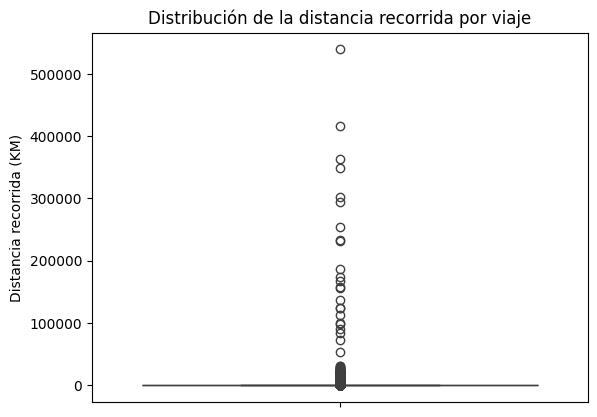

In [54]:
# Graficamos la distribucion de la variable trip_distance
sns.boxplot(y=trip_data.trip_distance)\
   .set(
        title='Distribución de la distancia recorrida por viaje',
        xlabel='', 
        ylabel='Distancia recorrida (KM)'
   )
plt.show()

Por lo tanto, el valor promedio es 6.23 km por viaje. 1.71 km cuártil 1, 2.88 km para el cuártil 2 (mediana) y 5.35 km cuártil 3), la mínima 0 y la máxima 539135.9 km.

Los features de montos (fare_amount, extra, mta_tax, improvement_surcharge, tip_amount, tolls_amount, total_amount, congestion_surcharge) vamos a analizarlos a la par (excepto airport_fee y Airport_fee que tienen muy pocos datos).

fare_amount: La tarifa de tiempo y distancia calculada por el taxímetro.

extra: Extras y recargos varios. Actualmente, esto solo incluye los cargos de $(0.50 y 1) por hora pico y por noche.

mta_tax: Impuesto de $0.50 de la MTA (Autoridad Metropolitana del Transporte) que se activa automáticamente en función de la tarifa medida en uso.

improvement_surcharge: Recargo por mejoras de $0.30 para viajes en el momento de la bajada de bandera.

tip_amount: se completa automáticamente para las propinas con tarjeta de crédito. Las propinas en efectivo no están incluidas.

tolls_amount: Importe total de todos los peajes pagados en el viaje.

total_amount: Importe total cobrado a los pasajeros. No incluye propinas en efectivo.

congestion_surcharge: Monto total recaudado en el viaje por el recargo por congestión en el estado de Nueva York.

In [55]:
amount_details = trip_data.loc[: , ['total_amount', 'fare_amount', 'extra', 'mta_tax', 'improvement_surcharge', 'tip_amount', 'tolls_amount', 'congestion_surcharge']] 
amount_details.describe()

,total_amount,fare_amount,extra,mta_tax,improvement_surcharge,tip_amount,tolls_amount,congestion_surcharge
count,9.384487e+06,9.384487e+06,9.384487e+06,9.384487e+06,9.384487e+06,9.384487e+06,9.384487e+06,9.148308e+06
mean,2.726654e+01,1.851788e+01,1.577978e+00,4.878527e-01,9.814725e-01,3.419354e+00,5.338850e-01,2.278006e+00
std,2.232619e+01,1.787964e+01,1.810455e+00,1.020753e-01,1.867307e-01,3.893056e+00,2.058199e+00,7.694737e-01
min,-9.829500e+02,-9.599000e+02,-7.500000e+00,-5.000000e-01,-1.000000e+00,-9.622000e+01,-7.330000e+01,-2.500000e+00
25%,1.550000e+01,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00,0.000000e+00,2.500000e+00
50%,2.030000e+01,1.280000e+01,1.000000e+00,5.000000e-01,1.000000e+00,2.800000e+00,0.000000e+00,2.500000e+00
75%,2.904000e+01,2.050000e+01,2.500000e+00,5.000000e-01,1.000000e+00,4.250000e+00,0.000000e+00,2.500000e+00
max,2.208100e+03,2.203100e+03,2.080000e+01,5.316000e+01,1.000000e+00,9.843000e+02,1.969900e+02,2.750000e+00


Los montos e impuestos negativos por viaje no tienen sentido y los consideramos mal cargados, por lo que los vamos a poner en positivos.

In [56]:
trip_data.total_amount = trip_data.total_amount.apply(lambda x: (x * -1) if x < 0 else x)
trip_data.fare_amount = trip_data.fare_amount.apply(lambda x: (x * -1) if x < 0 else x)
trip_data.extra = trip_data.extra.apply(lambda x: (x * -1) if x < 0 else x)
trip_data.mta_tax = trip_data.mta_tax.apply(lambda x: (x * -1) if x < 0 else x)
trip_data.improvement_surcharge = trip_data.improvement_surcharge.apply(lambda x: (x * -1) if x < 0 else x)
trip_data.tip_amount = trip_data.tip_amount.apply(lambda x: (x * -1) if x < 0 else x)
trip_data.tolls_amount = trip_data.tolls_amount.apply(lambda x: (x * -1) if x < 0 else x)
trip_data.congestion_surcharge = trip_data.congestion_surcharge.apply(lambda x: (x * -1) if x < 0 else x)

In [57]:
amount_details = trip_data.loc[: , ['total_amount', 'fare_amount', 'extra', 'mta_tax', 'improvement_surcharge', 'tip_amount', 'tolls_amount', 'congestion_surcharge']] 
amount_details.describe()

,total_amount,fare_amount,extra,mta_tax,improvement_surcharge,tip_amount,tolls_amount,congestion_surcharge
count,9.384487e+06,9.384487e+06,9.384487e+06,9.384487e+06,9.384487e+06,9.384487e+06,9.384487e+06,9.148308e+06
mean,2.767730e+01,1.884393e+01,1.594836e+00,4.961353e-01,9.984489e-01,3.419879e+00,5.416084e-01,2.312560e+00
std,2.181490e+01,1.753567e+01,1.795622e+00,4.763808e-02,3.544514e-02,3.892595e+00,2.056180e+00,6.583807e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+01,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00,0.000000e+00,2.500000e+00
50%,2.046000e+01,1.280000e+01,1.000000e+00,5.000000e-01,1.000000e+00,2.800000e+00,0.000000e+00,2.500000e+00
75%,2.920000e+01,2.050000e+01,2.500000e+00,5.000000e-01,1.000000e+00,4.250000e+00,0.000000e+00,2.500000e+00
max,2.208100e+03,2.203100e+03,2.080000e+01,5.316000e+01,1.000000e+00,9.843000e+02,1.969900e+02,2.750000e+00


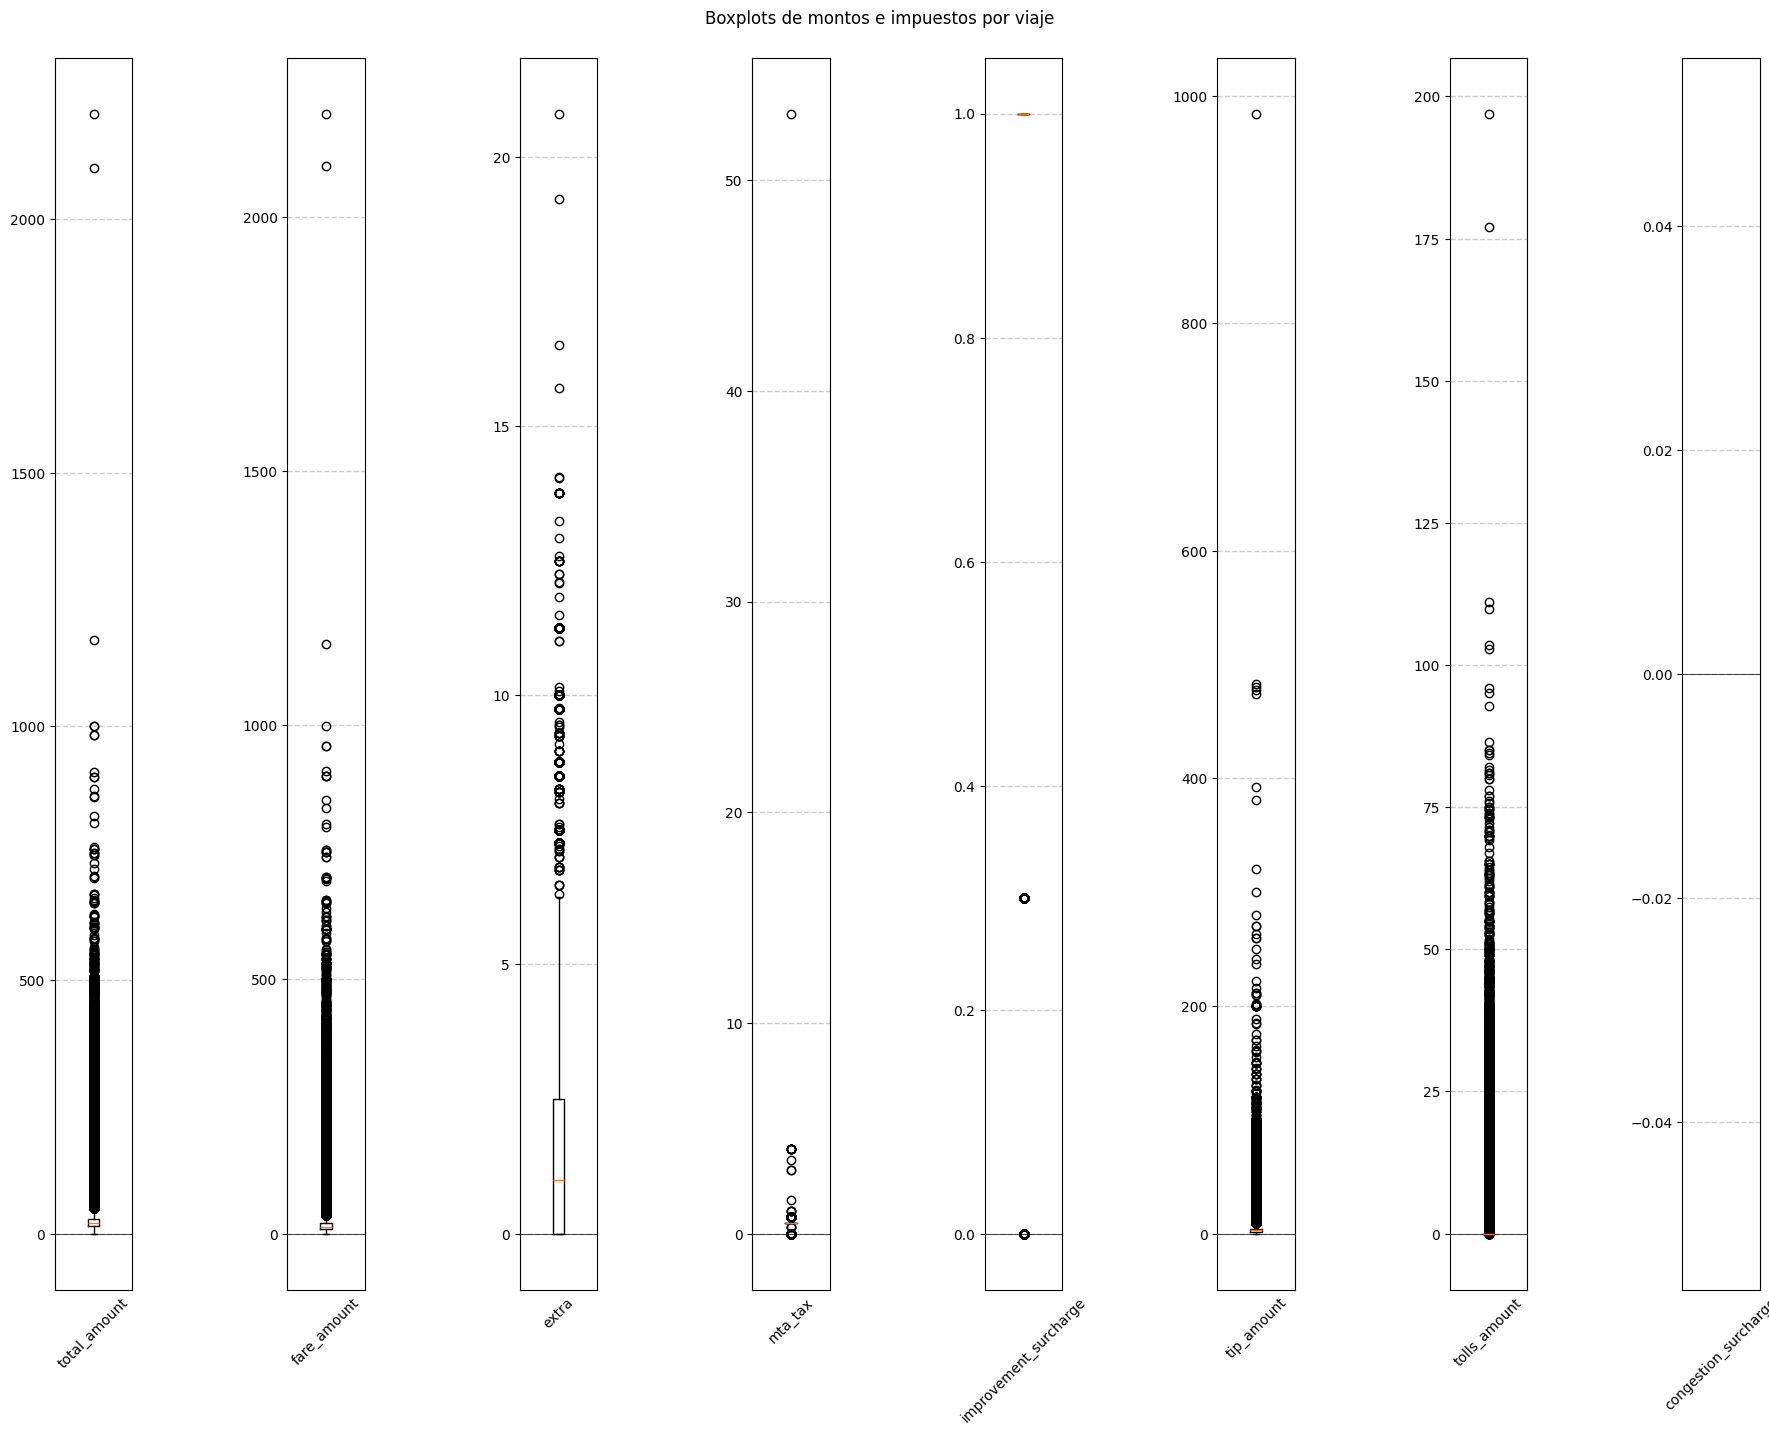

In [58]:
fig = plt.figure(figsize = (22, 16))
fig.subplots_adjust(hspace=0.5, wspace=2)

amount_details_columns = amount_details.columns

# Grafica cada columna en un boxplot diferente
for i in range(amount_details_columns.size):
    ax = fig.add_subplot(1, amount_details_columns.size, i+1)
    ax.boxplot(amount_details[amount_details_columns[i]])
    ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.set_xlabel(amount_details_columns[i],rotation = 45)
    ax.set_xticks([])
fig.suptitle("Boxplots de montos e impuestos por viaje",x=0.50,y=0.91)    
plt.show()

In [59]:
del amount_details
del amount_details_columns
# Perform garbage collection
gc.collect()

3155

### Correlaciones existentes entre las variables

In [60]:
trip_data.columns

Index(['index', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee',
       'weekday', 'dayofweek', 'payment_type_name', 'vendor_description',
       'ratecode_description'],
      dtype='object')

Elegimos algunas columnas para hacer los gráficos de dispersión y la matriz de correlación, las que consideramos mas relevantes:

Text(0.5, 1.025, 'Dispersión de valores entre las variables')

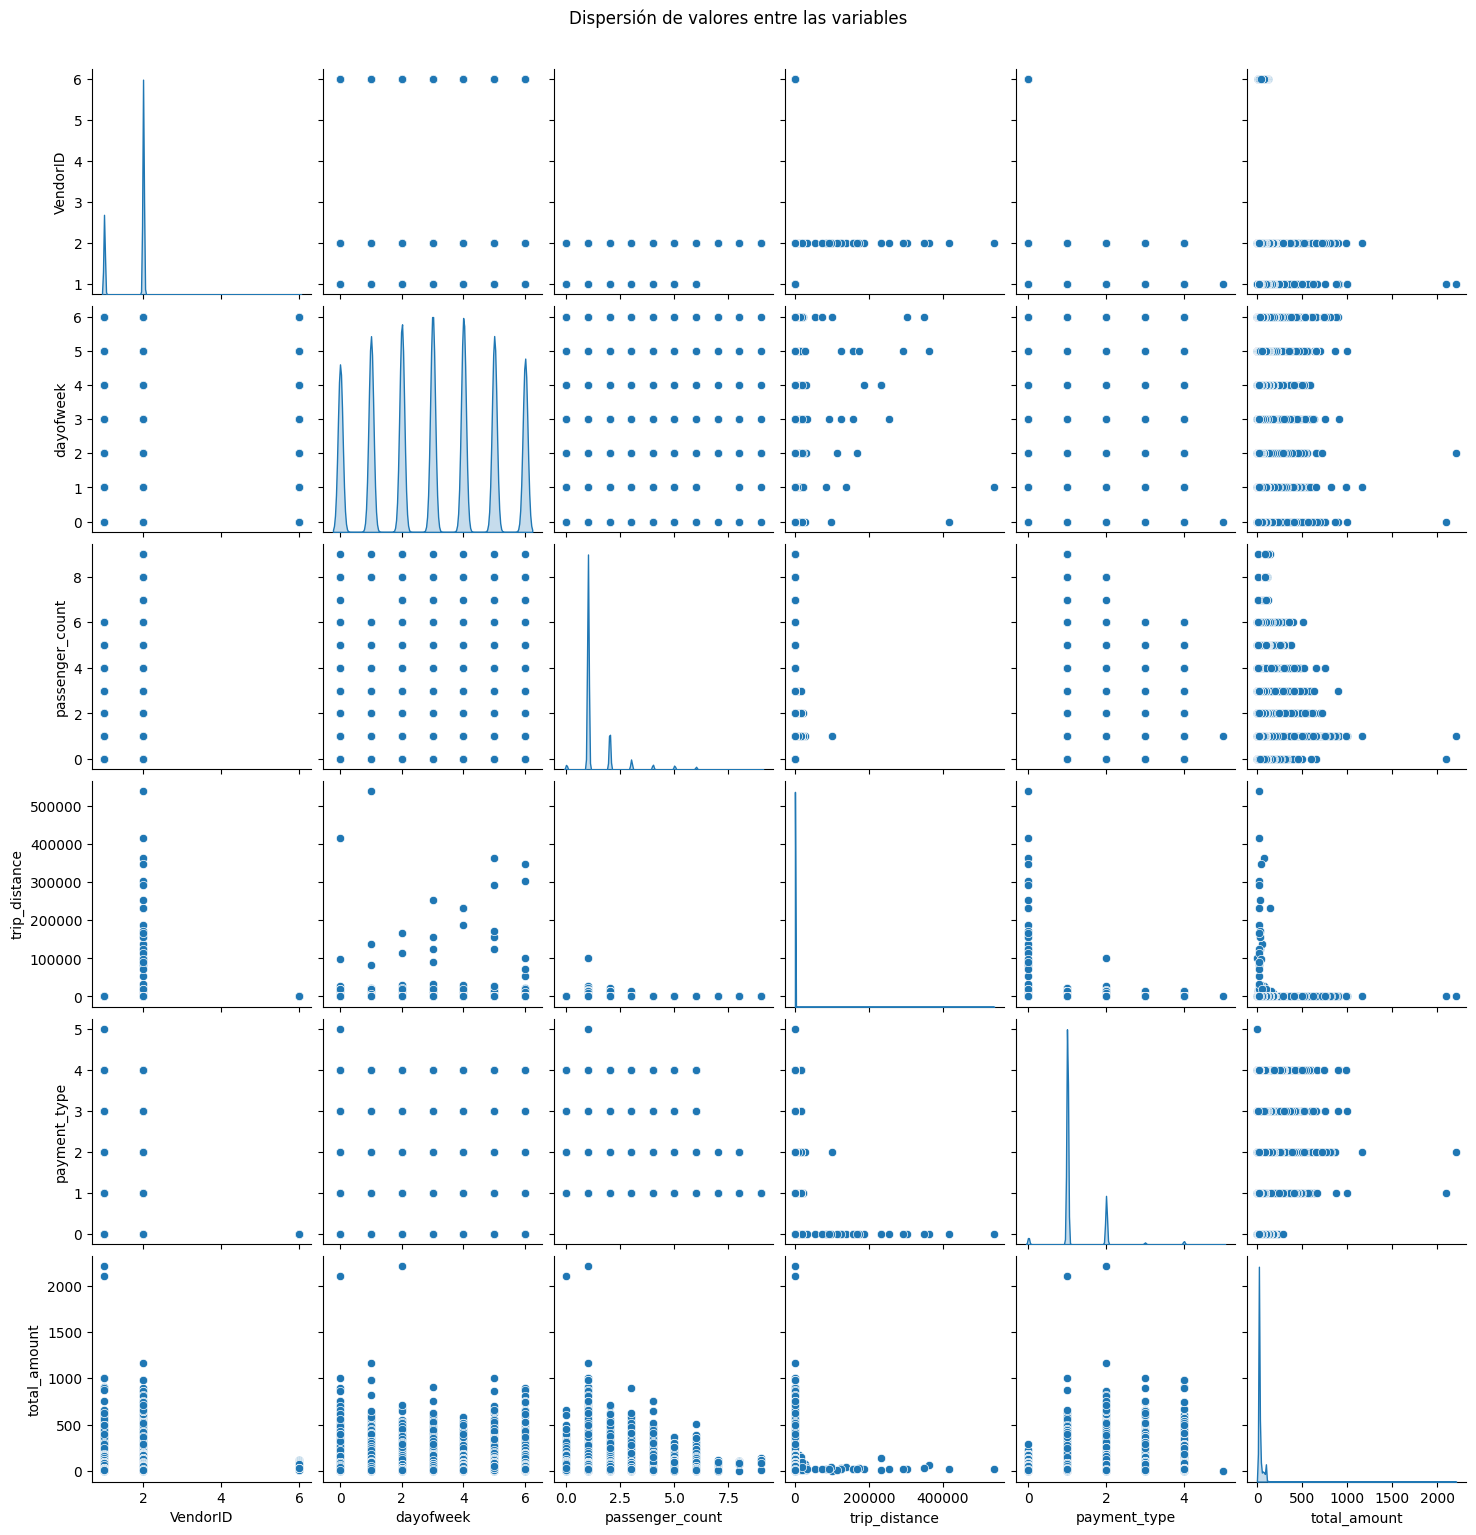

In [61]:
dispersion = trip_data[['VendorID', 'dayofweek', 'passenger_count', 'trip_distance', 'payment_type', 'total_amount']]
sns.pairplot(dispersion, diag_kind='kde').fig.suptitle('Dispersión de valores entre las variables',y=1.025)

Análisis de la Covarianza y Correlación entre los features

In [62]:
#Calculo la covarianza
matriz_cov = dispersion.cov()
matriz_cov

,VendorID,dayofweek,passenger_count,trip_distance,payment_type,total_amount
VendorID,0.204332,0.013109,0.039955,0.344484,0.002484,0.445864
dayofweek,0.013109,3.676713,0.086408,0.233192,-0.002122,-0.510073
passenger_count,0.039955,0.086408,0.792769,0.184648,0.004951,0.643516
trip_distance,0.344484,0.233192,0.184648,145185.079802,-0.887498,146.813465
payment_type,0.002484,-0.002122,0.004951,-0.887498,0.281961,-0.888520
total_amount,0.445864,-0.510073,0.643516,146.813465,-0.888520,475.890076


In [63]:
#Calculo la correlación
matriz_corr = dispersion.corr()
matriz_corr

,VendorID,dayofweek,passenger_count,trip_distance,payment_type,total_amount
VendorID,1.000000,0.015125,0.100839,0.002000,0.010347,0.045215
dayofweek,0.015125,1.000000,0.050610,0.000319,-0.002084,-0.012194
passenger_count,0.100839,0.050610,1.000000,0.003940,0.011081,0.032967
trip_distance,0.002000,0.000319,0.003940,1.000000,-0.004386,0.017662
payment_type,0.010347,-0.002084,0.011081,-0.004386,1.000000,-0.076704
total_amount,0.045215,-0.012194,0.032967,0.017662,-0.076704,1.000000


In [64]:
del dispersion
del matriz_cov
# Perform garbage collection
gc.collect()

322

[Text(0.5, 1.0, '\nCorrelación entre las variables\n')]

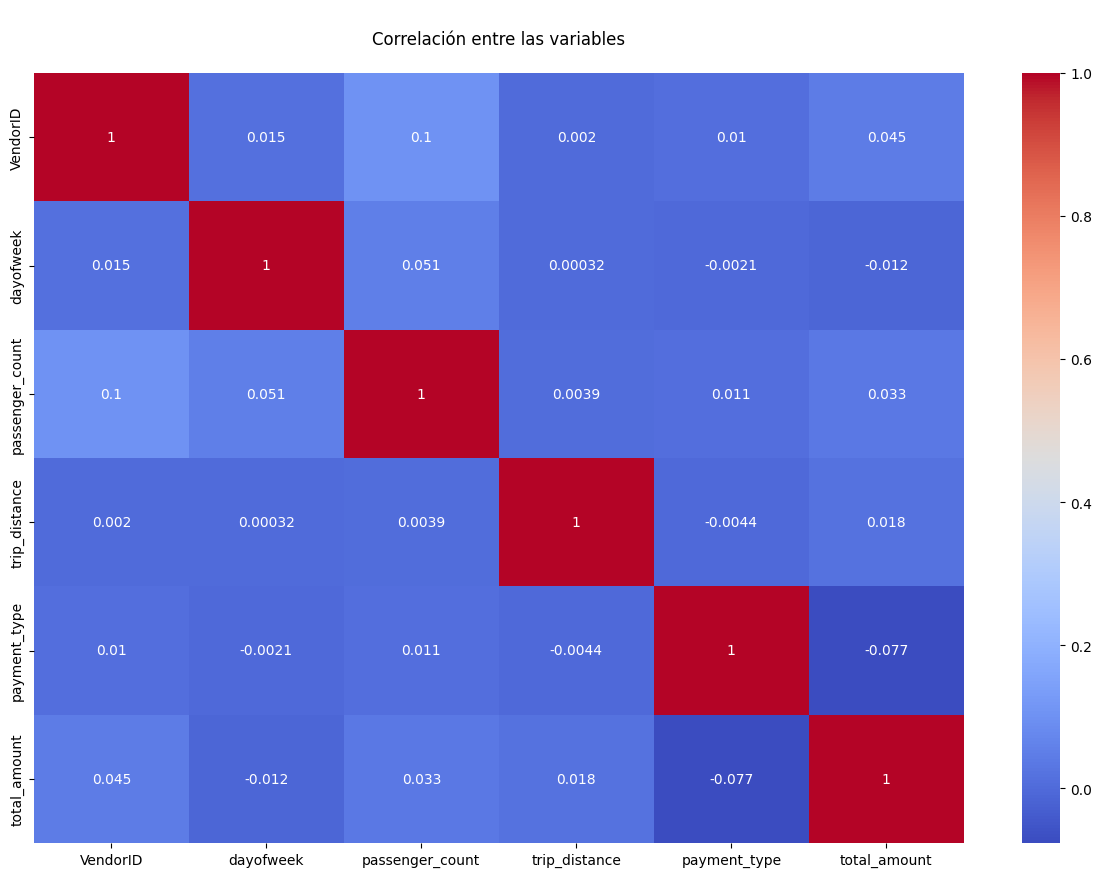

In [65]:
plt.figure(figsize=(15,10))
plt.title="Matriz de correlación"
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm').set(title='\nCorrelación entre las variables\n')

La matriz de correlación muestra el grado de correlación entre cada par de variables, que puede variar entre -1 y 1. Un valor de -1 indica una correlación negativa fuerte, un valor de 0 indica que no hay correlación y un valor de 1 indica una correlación positiva fuerte.

Text(0.5, 1.025, 'Correlación entre las variables')

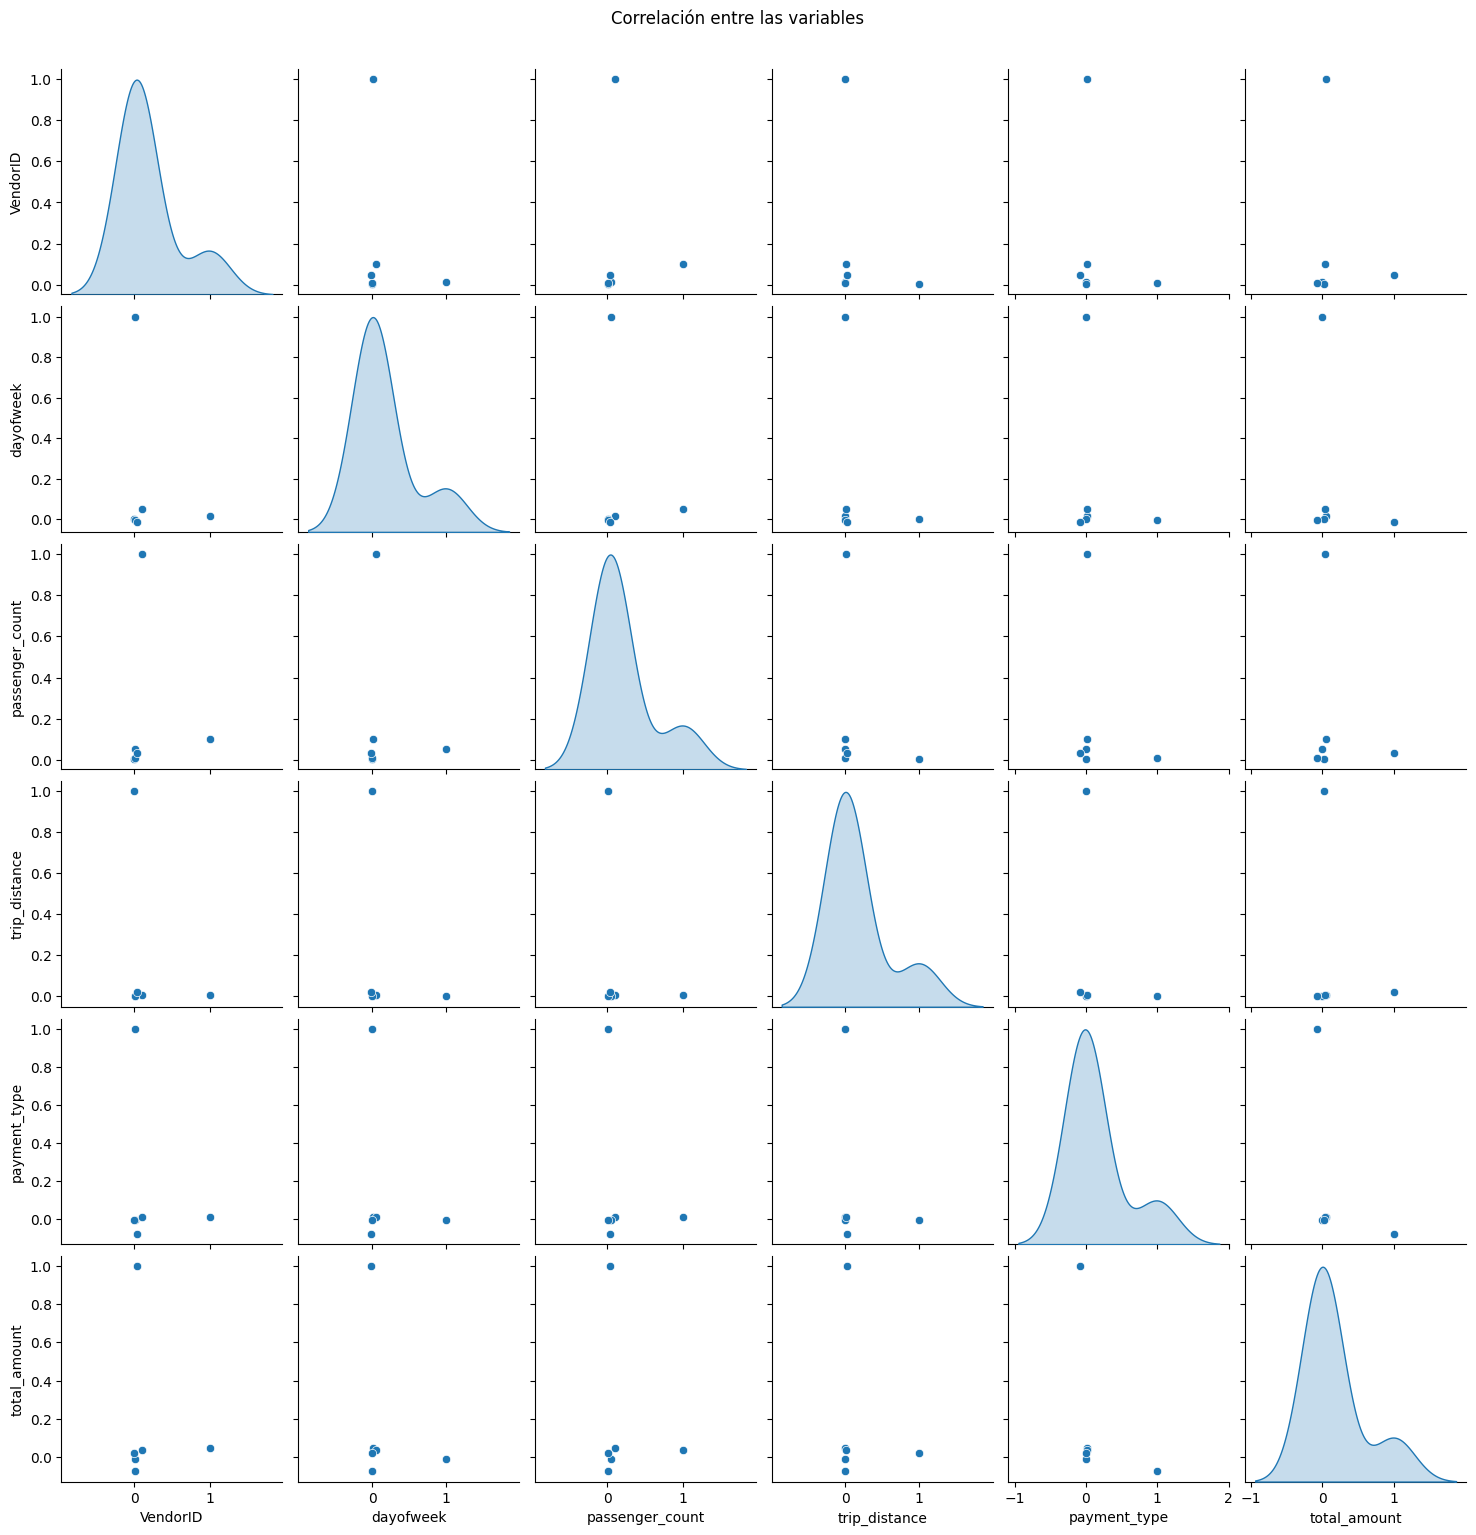

In [66]:
sns.pairplot(matriz_corr, diag_kind='kde').fig.suptitle('Correlación entre las variables',y=1.025)

Se puede apreciar tanto con el heatmap y pairplot que no hay mucha correlación entre las variables. Aún así la correlación positiva más fuerte es entre los features passenger_count con VendorID (0.1) y con dayofweek (con 0.051). Para la correlación negativa más fuerte son los features dayofweek con total_amount (-0.012). Además, con el feature trip_distance casi que no tiene correlación, apenas un poco con total_amount (0.018).

In [67]:
del matriz_corr
# Perform garbage collection
gc.collect()

311

## b) Datos Faltantes

Los features airport_fee y Airport_fee tienen el 70% y 30% aprox. respectivamente de datos faltantes, por lo tanto los vamos a eliminar.

In [68]:
trip_data.drop(['airport_fee','Airport_fee'], axis=1, inplace=True)
trip_data.columns

Index(['index', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'weekday', 'dayofweek',
       'payment_type_name', 'vendor_description', 'ratecode_description'],
      dtype='object')

El feature passenger_count (cantidad de pasajeros) tiene un tipo de variable float64 con lo cual no tiene sentido, así que lo convertimos a int64, así que necesitamos rellenar los NaN, que por lo que vimos son 236179 (el 2,5% aprox).Lo rellenamos con el valor promedio, ya que consideramos que no afecta demasiado al análisis. En este caso el promedio aproximado es 1 pasajero.

In [69]:
trip_data['passenger_count'] = trip_data['passenger_count'].fillna(1)
trip_data['passenger_count'] = trip_data['passenger_count'].astype('int64')
trip_data.passenger_count.dtypes

dtype('int64')

In [70]:
trip_data.passenger_count.describe()

count    9.384487e+06
mean     1.346553e+00
std      8.808621e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

Vemos que el mínimo valor es el 0, el cual tiene sentido un viaje sin pasajeros sólo en los casos donde el viaje haya sido ANULADO (payment_type = 5). Si no se dá esa condición lo consideramos como un valor mal ingresado y vamos a analizarlo para ver si lo reemplazamos el valor o eliminamos el registro.

In [71]:
trip_data_without_passenger = trip_data.loc[(trip_data.passenger_count == 0) & (trip_data.payment_type != 5) , :]
trip_data_without_passenger

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,weekday,dayofweek,payment_type_name,vendor_description,ratecode_description
3,3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0,3.057746,1.0,N,138,7,...,0.00,0.0,1.0,20.85,0.0,Domingo,6,Efectivo,"Creative Mobile Technologies, LLC.",Tarifa estándar
485,485,1,2023-01-01 00:22:18,2023-01-01 00:28:17,0,2.092142,1.0,N,170,107,...,2.70,0.0,1.0,16.30,2.5,Domingo,6,Efectivo,"Creative Mobile Technologies, LLC.",Tarifa estándar
486,486,1,2023-01-01 00:30:59,2023-01-01 00:34:46,0,1.609340,1.0,N,79,107,...,2.30,0.0,1.0,13.80,2.5,Domingo,6,Efectivo,"Creative Mobile Technologies, LLC.",Tarifa estándar
487,487,1,2023-01-01 00:36:19,2023-01-01 00:43:46,0,3.701482,1.0,N,107,232,...,3.25,0.0,1.0,19.65,2.5,Domingo,6,Efectivo,"Creative Mobile Technologies, LLC.",Tarifa estándar
488,488,1,2023-01-01 00:54:23,2023-01-01 01:08:18,0,3.379614,1.0,N,79,231,...,0.00,0.0,1.0,17.80,2.5,Domingo,6,Sin cargo,"Creative Mobile Technologies, LLC.",Tarifa estándar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9296419,3315698,2,2023-03-31 23:31:48,2023-03-31 23:32:06,0,0.000000,5.0,N,127,127,...,15.61,0.0,1.0,93.66,0.0,Viernes,4,Efectivo,VeriFone Inc.,Tarifa negociada
9296509,3315788,1,2023-03-31 23:33:04,2023-03-31 23:44:47,0,3.057746,1.0,N,233,237,...,3.55,0.0,1.0,21.35,2.5,Viernes,4,Efectivo,"Creative Mobile Technologies, LLC.",Tarifa estándar
9296549,3315828,1,2023-03-31 23:58:33,2023-04-01 00:08:32,0,3.057746,1.0,N,148,170,...,1.00,0.0,1.0,18.10,2.5,Viernes,4,Efectivo,"Creative Mobile Technologies, LLC.",Tarifa estándar
9296660,3315939,1,2023-03-31 23:06:48,2023-03-31 23:48:37,0,27.036912,1.0,N,138,39,...,0.00,0.0,1.0,79.65,0.0,Viernes,4,Disputa,"Creative Mobile Technologies, LLC.",Tarifa estándar


In [72]:
trip_data_without_passenger.describe()

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,dayofweek
count,1.568060e+05,156806.000000,156806,156806,156806.0,156806.000000,156806.000000,156806.000000,156806.000000,156806.000000,156806.000000,156806.000000,156806.000000,156806.000000,156806.000000,156806.000000,156806.000000,156806.000000,156806.000000
mean,1.533144e+06,1.003303,2023-02-16 13:11:21.443726,2023-02-16 13:24:58.490357,0.0,4.449166,1.147533,168.031459,166.452770,1.245883,16.485572,3.259980,0.495777,2.948740,0.360904,0.997423,24.552933,2.331591,3.024023
min,2.000000e+00,1.000000,2023-01-01 00:03:48,2023-01-01 00:07:23,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.518640e+05,1.000000,2023-01-24 22:14:16,2023-01-24 22:25:25.250000,0.0,1.448406,1.000000,132.000000,125.000000,1.000000,8.600000,2.500000,0.500000,0.110000,0.000000,1.000000,14.700000,2.500000,1.000000
50%,1.527154e+06,1.000000,2023-02-16 23:13:01,2023-02-16 23:25:03.500000,0.0,2.574944,1.000000,162.000000,162.000000,1.000000,12.100000,2.500000,0.500000,2.500000,0.000000,1.000000,18.950000,2.500000,3.000000
75%,2.301368e+06,1.000000,2023-03-10 19:51:09.250000,2023-03-10 20:03:43.250000,0.0,4.506152,1.000000,234.000000,236.000000,1.000000,17.700000,3.500000,0.500000,3.860000,0.000000,1.000000,26.000000,2.500000,5.000000
max,3.315946e+06,2.000000,2023-03-31 23:59:59,2023-04-01 00:22:44,0.0,191.994262,99.000000,265.000000,265.000000,4.000000,2100.000000,12.500000,4.000000,270.000000,92.750000,1.000000,2100.000000,2.500000,6.000000
std,8.990916e+05,0.057381,NaN,NaN,0.0,6.040460,2.890973,63.322463,68.954123,0.515576,16.598975,1.472399,0.051466,3.482374,1.760073,0.047663,19.882120,0.626628,1.917974


Hay 156806 registros que tienen la cantidad de pasajeros en 0 (y no son viajes anulados), y todos los demás campos tienen los datos distintos de NaN, por lo tanto vamos a salvar los registros reemplazando el valor por el promedio, que es 1 (ya que es sólo el 1,67% de los datos).

In [73]:
trip_data_without_passenger_and_cancelled = trip_data.loc[(trip_data.passenger_count == 0) & (trip_data.payment_type == 5) , :]
trip_data_without_passenger_and_cancelled

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,weekday,dayofweek,payment_type_name,vendor_description,ratecode_description


In [74]:
del trip_data_without_passenger
del trip_data_without_passenger_and_cancelled
# Perform garbage collection
gc.collect()

0

O sea, todos los passenger_count igual a 0 están mal cargados y los reemplazamos por el promedio 1.

In [75]:
trip_data.passenger_count = trip_data.passenger_count.apply(lambda x: 1 if x == 0 else x)
trip_data.passenger_count.describe()

count    9.384487e+06
mean     1.363262e+00
std      8.644933e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.000000e+00
Name: passenger_count, dtype: float64

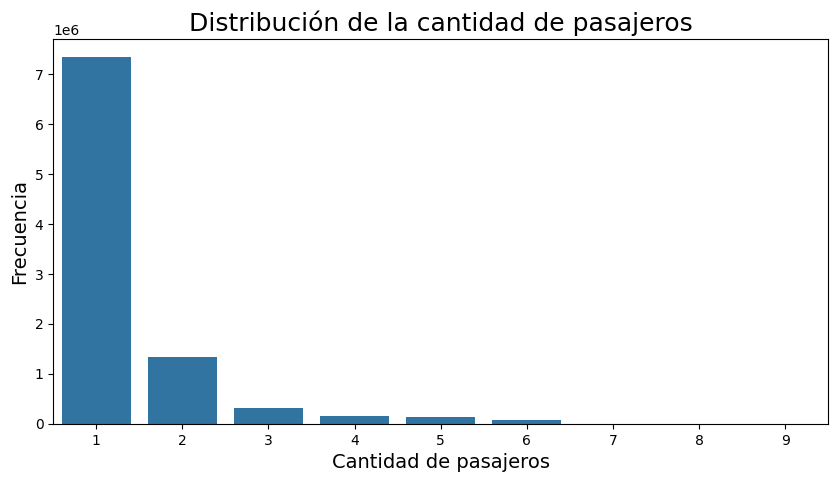

In [76]:
# Graficamos la distribución de la variable cuantitativa passenger_count
plt.figure(figsize=(10,5))
passenger_count_plt = sns.countplot(x='passenger_count', data=trip_data, order=[1,2,3,4,5,6,7,8,9])
passenger_count_plt.set_title('Distribución de la cantidad de pasajeros', size=18)
passenger_count_plt.set_ylabel('Frecuencia', size=14)
passenger_count_plt.set_xlabel('Cantidad de pasajeros', size=14)
plt.show()

In [77]:
del passenger_count_plt
# Perform garbage collection
gc.collect()

148

El feature RatecodeID tiene el 2,5% de datos faltantes que vamos a rellenar con el valor promedio, ya que consideramos que no afecta demasiado al análisis. 

In [78]:
trip_data.RatecodeID.unique()

array([ 1.,  2.,  4., 99.,  5.,  3.,  6., nan])

In [79]:
trip_data.RatecodeID.describe()

count    9.148308e+06
mean     1.548610e+00
std      6.855882e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.900000e+01
Name: RatecodeID, dtype: float64

El promedio aproximado es 1.54 aprox el ID de código de tarifa. Así que viendo que el 50% es 1.0, es el valor promedio.

In [80]:
trip_data['RatecodeID'] = trip_data['RatecodeID'].fillna(1.0)
trip_data.RatecodeID.describe()

count    9.384487e+06
mean     1.534803e+00
std      6.769607e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      9.900000e+01
Name: RatecodeID, dtype: float64

En cuanto al ID 99 que no se encuentra como un valor válido en la documentación de los datos, y notando que el ID 6 no tiene registros asociados, vamos a analizar si el ID 99 puede ser que sean registros para el ID 6.

In [81]:
RatecodeID_6_df = trip_data.loc[(trip_data.RatecodeID == 6.0) , :]
RatecodeID_6_df

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,weekday,dayofweek,payment_type_name,vendor_description,ratecode_description
42102,42102,1,2023-01-01 14:20:35,2023-01-01 14:21:29,1,0.000000,6.0,N,24,24,...,0.00,0.00,1.0,4.00,0.0,Domingo,6,Disputa,"Creative Mobile Technologies, LLC.",Viaje en grupo
103459,103459,1,2023-01-02 15:05:57,2023-01-02 15:06:52,1,0.000000,6.0,N,236,236,...,81.65,6.55,1.0,100.00,0.0,Lunes,0,Efectivo,"Creative Mobile Technologies, LLC.",Viaje en grupo
634920,634920,1,2023-01-08 08:15:40,2023-01-08 08:15:58,1,0.000000,6.0,N,265,265,...,0.00,0.00,1.0,656.85,0.0,Domingo,6,Disputa,"Creative Mobile Technologies, LLC.",Viaje en grupo
1134849,1134849,1,2023-01-13 14:49:57,2023-01-13 14:50:18,1,0.000000,6.0,N,265,265,...,0.00,12.75,1.0,24.55,0.0,Viernes,4,Disputa,"Creative Mobile Technologies, LLC.",Viaje en grupo
1481541,1481541,1,2023-01-16 22:47:00,2023-01-16 22:47:06,1,10.299776,6.0,N,132,132,...,0.00,0.00,1.0,6.25,0.0,Lunes,0,Disputa,"Creative Mobile Technologies, LLC.",Viaje en grupo
2848704,2848704,1,2023-01-30 13:54:45,2023-01-30 13:54:50,1,0.000000,6.0,N,161,161,...,0.00,0.00,1.0,5.00,0.0,Lunes,0,Sin cargo,"Creative Mobile Technologies, LLC.",Viaje en grupo
3330898,264132,1,2023-02-03 14:32:17,2023-02-03 14:32:30,1,0.000000,6.0,N,132,132,...,0.00,0.00,1.0,5.25,0.0,Viernes,4,Disputa,"Creative Mobile Technologies, LLC.",Viaje en grupo
3683604,616838,1,2023-02-07 11:48:01,2023-02-07 11:48:04,1,1.448406,6.0,N,164,164,...,0.00,0.00,1.0,4.00,0.0,Martes,1,Sin cargo,"Creative Mobile Technologies, LLC.",Viaje en grupo
5029335,1962569,1,2023-02-20 12:46:32,2023-02-20 12:46:45,1,3.057746,6.0,N,161,161,...,0.00,0.00,1.0,4.00,0.0,Lunes,0,Disputa,"Creative Mobile Technologies, LLC.",Viaje en grupo
5300454,2233688,2,2023-02-23 07:06:03,2023-02-23 07:12:04,1,0.016093,6.0,N,132,132,...,0.00,0.00,1.0,5.25,0.0,Jueves,3,Sin cargo,VeriFone Inc.,Viaje en grupo


Por lo tanto como el ID 6 tiene solo 16 registros, le asignamos los registros del 99 (ya que lo consideramos mal cargados).

In [82]:
trip_data.RatecodeID = trip_data.RatecodeID.apply(lambda x: 6.0 if x == 99.0 else x)
trip_data.RatecodeID.describe()

count    9.384487e+06
mean     1.089587e+00
std      4.983780e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      6.000000e+00
Name: RatecodeID, dtype: float64

In [83]:
trip_data.ratecode_description = trip_data.RatecodeID.apply(lambda x: 'Tarifa estándar' if x == 1 else 
                                                         ('JFK' if x == 2 else ('Newark' if x == 3 else 
                                                                ('Nassau o Westchester' if x == 4 else ('Tarifa negociada' if x == 5 else 
                                                                        ('Viaje en grupo' if x == 6 else x))))))

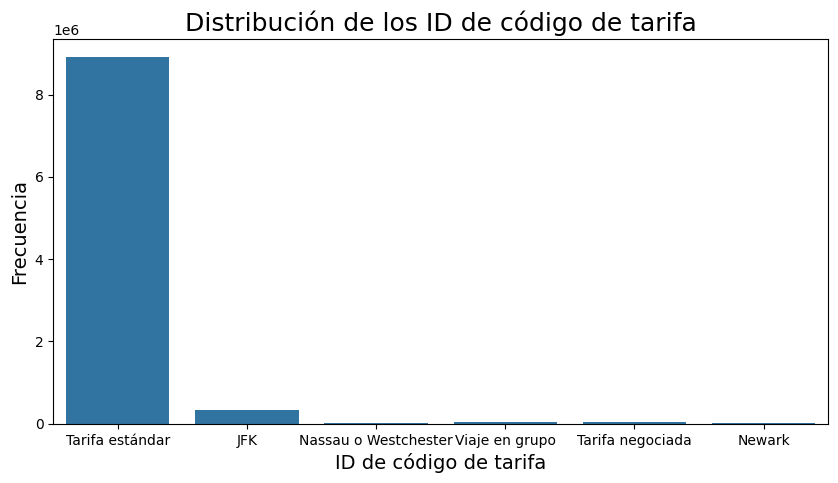

In [84]:
# Graficamos la distribucion de la variable RatecodeID
plt.figure(figsize=(10,5))
RatecodeID_count_plt = sns.countplot(x='ratecode_description', data=trip_data)
RatecodeID_count_plt.set_title('Distribución de los ID de código de tarifa', size=18)
RatecodeID_count_plt.set_ylabel('Frecuencia', size=14)
RatecodeID_count_plt.set_xlabel('ID de código de tarifa', size=14)
plt.show()

In [85]:
del RatecodeID_6_df
del RatecodeID_count_plt
# Perform garbage collection
gc.collect()

7348

El feature store_and_fwd_flag tiene el 2,5% de datos faltantes que vamos a rellenar con el valor promedio, ya que consideramos que no afecta demasiado al análisis. 

In [86]:
trip_data.store_and_fwd_flag.unique()

array(['N', 'Y', None], dtype=object)

In [87]:
trip_data.store_and_fwd_flag.describe()

count     9148308
unique          2
top             N
freq      9095120
Name: store_and_fwd_flag, dtype: object

Por lo tanto rellenamos con el valor "N" la variable cualitativa store_and_fwd_flag

In [88]:
trip_data['store_and_fwd_flag'] = trip_data['store_and_fwd_flag'].fillna('N')
trip_data.store_and_fwd_flag.describe()

count     9384487
unique          2
top             N
freq      9331299
Name: store_and_fwd_flag, dtype: object

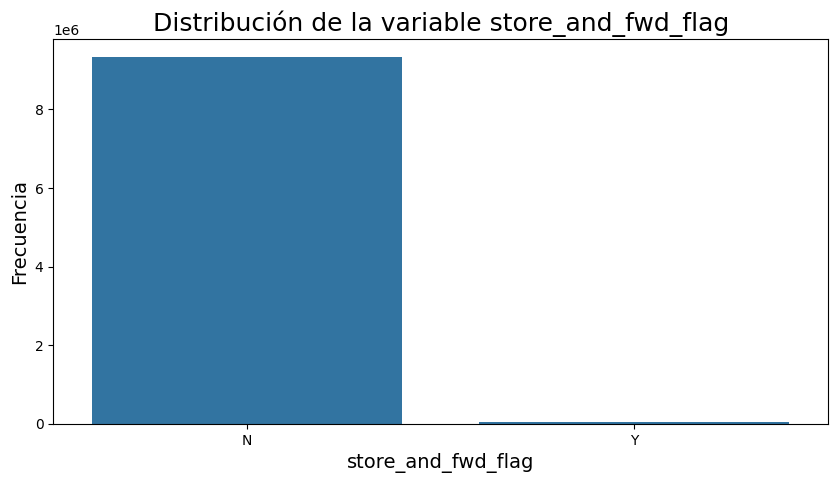

In [89]:
# Graficamos la distribucion de la variable store_and_fwd_flag
plt.figure(figsize=(10,5))
store_and_fwd_flag_plt = sns.countplot(x='store_and_fwd_flag', data=trip_data)
store_and_fwd_flag_plt.set_title('Distribución de la variable store_and_fwd_flag', size=18)
store_and_fwd_flag_plt.set_ylabel('Frecuencia', size=14)
store_and_fwd_flag_plt.set_xlabel('store_and_fwd_flag', size=14)
plt.show()

In [90]:
del store_and_fwd_flag_plt
# Perform garbage collection
gc.collect()

2963

El feature congestion_surcharge tiene el 2,5% de datos faltantes que vamos a rellenar con el valor promedio, ya que consideramos que no afecta demasiado al análisis. 

In [91]:
trip_data.congestion_surcharge.unique()

array([2.5 , 0.  ,  nan, 2.75, 1.  ])

In [92]:
trip_data.congestion_surcharge.describe()

count    9.148308e+06
mean     2.312560e+00
std      6.583807e-01
min      0.000000e+00
25%      2.500000e+00
50%      2.500000e+00
75%      2.500000e+00
max      2.750000e+00
Name: congestion_surcharge, dtype: float64

El promedio aproximado es 2.31 aprox el recargo por congestión. Así que viendo que el 50% es 2.5, es el valor promedio.

In [93]:
trip_data['congestion_surcharge'] = trip_data['congestion_surcharge'].fillna(2.5)
trip_data.congestion_surcharge.describe()

count    9.384487e+06
mean     2.317278e+00
std      6.507059e-01
min      0.000000e+00
25%      2.500000e+00
50%      2.500000e+00
75%      2.500000e+00
max      2.750000e+00
Name: congestion_surcharge, dtype: float64

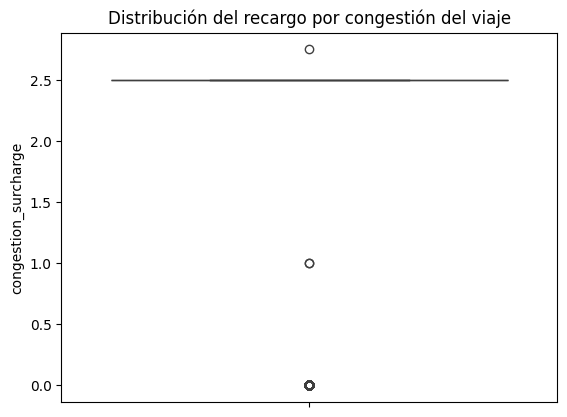

In [94]:
# Graficamos la distribucion de la variable congestion_surcharge
sns.boxplot(y=trip_data.congestion_surcharge).set(title='Distribución del recargo por congestión del viaje')
plt.show()

El feature VendorID no tiene datos faltantes pero si tiene un valor mal cargado, el 6. Ya que según la documentación de los datos los valores posibles son el 1 (Creative Mobile Technologies, LLC.) y el 2 (VeriFone Inc.). Así que lo reemplazamos por el promedio que es el 2.

In [95]:
trip_data.VendorID = trip_data.VendorID.apply(lambda x: 2 if x == 6 else x)
trip_data.VendorID.describe()

count    9.384487e+06
mean     1.727437e+00
std      4.452778e-01
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      2.000000e+00
Name: VendorID, dtype: float64

In [96]:
trip_data.vendor_description = trip_data.VendorID.apply(lambda x: 'Creative Mobile Technologies, LLC.' if x == 1 else 
                                                         ('VeriFone Inc.' if x == 2 else x))

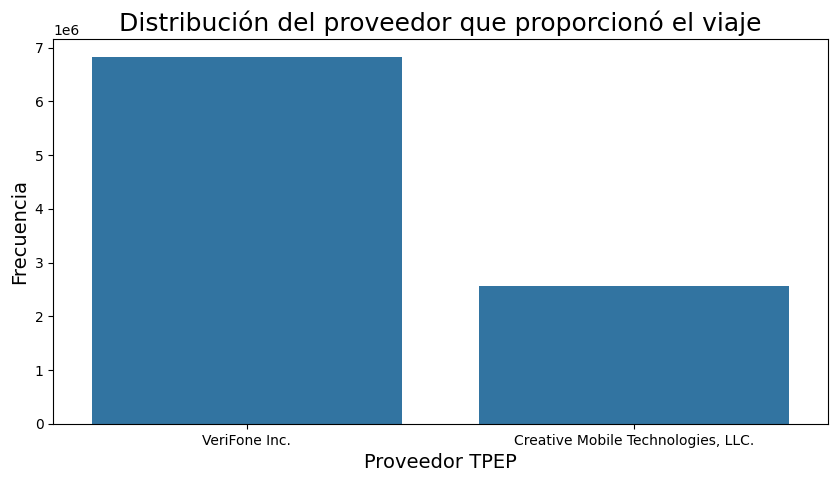

In [97]:
# Graficamos la distribucion de la variable vendor_description
plt.figure(figsize=(10,5))
VendorID_count_plt = sns.countplot(x='vendor_description', data=trip_data)
VendorID_count_plt.set_title('Distribución del proveedor que proporcionó el viaje', size=18)
VendorID_count_plt.set_ylabel('Frecuencia', size=14)
VendorID_count_plt.set_xlabel('Proveedor TPEP', size=14)
plt.show()

In [98]:
del VendorID_count_plt
# Perform garbage collection
gc.collect()

2542

El feature total_amount vimos que tiene valores en 0 y eso no tiene sentido, ya que representaría a un viaje gratis.

In [99]:
total_amount_df = trip_data.loc[trip_data.total_amount == 0.0, ['total_amount', 'fare_amount', 'extra', 'mta_tax', 'improvement_surcharge', 'tip_amount', 'tolls_amount', 'congestion_surcharge']]
total_amount_df

,total_amount,fare_amount,extra,mta_tax,improvement_surcharge,tip_amount,tolls_amount,congestion_surcharge
3291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
9287013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9289748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9298286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5
9304545,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5


Son 1734 rows con total_amount en 0, por lo tanto tomamos la decisión de eliminar los registros ya que sólo reprensetan el 0.018% del dataset y no influye demasiado.

In [100]:
trip_data = trip_data.loc[trip_data.total_amount > 0.0, :]

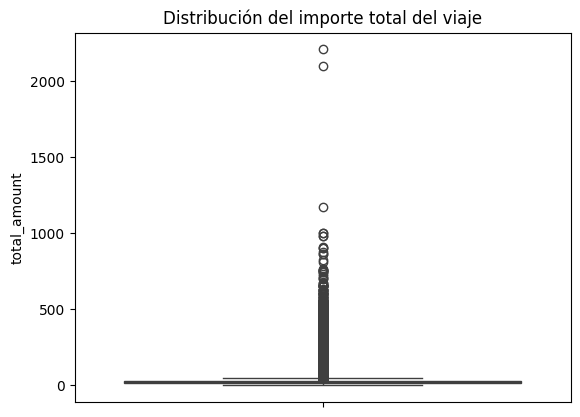

In [101]:
# Graficamos la distribucion de la variable congestion_surcharge
sns.boxplot(y=trip_data.total_amount).set(title='Distribución del importe total del viaje')
plt.show()

In [102]:
del total_amount_df
# Perform garbage collection
gc.collect()

5439

## c) Valores atípicos

Para los casos atípicos (outliers) vamos a analizar si son casos extremos o fueron mal cargados. Dependiendo de cada caso vamos a aplicar el método de eliminación (trimming) o de recorte (capping).

Vamos a analizar primero los importes que ya vimos que tenían outliers.

In [103]:
amount_details = trip_data.loc[: , ['total_amount', 'fare_amount', 'extra', 'mta_tax', 'improvement_surcharge', 'tip_amount', 'tolls_amount', 'congestion_surcharge']] 
amount_details_columns = amount_details.columns

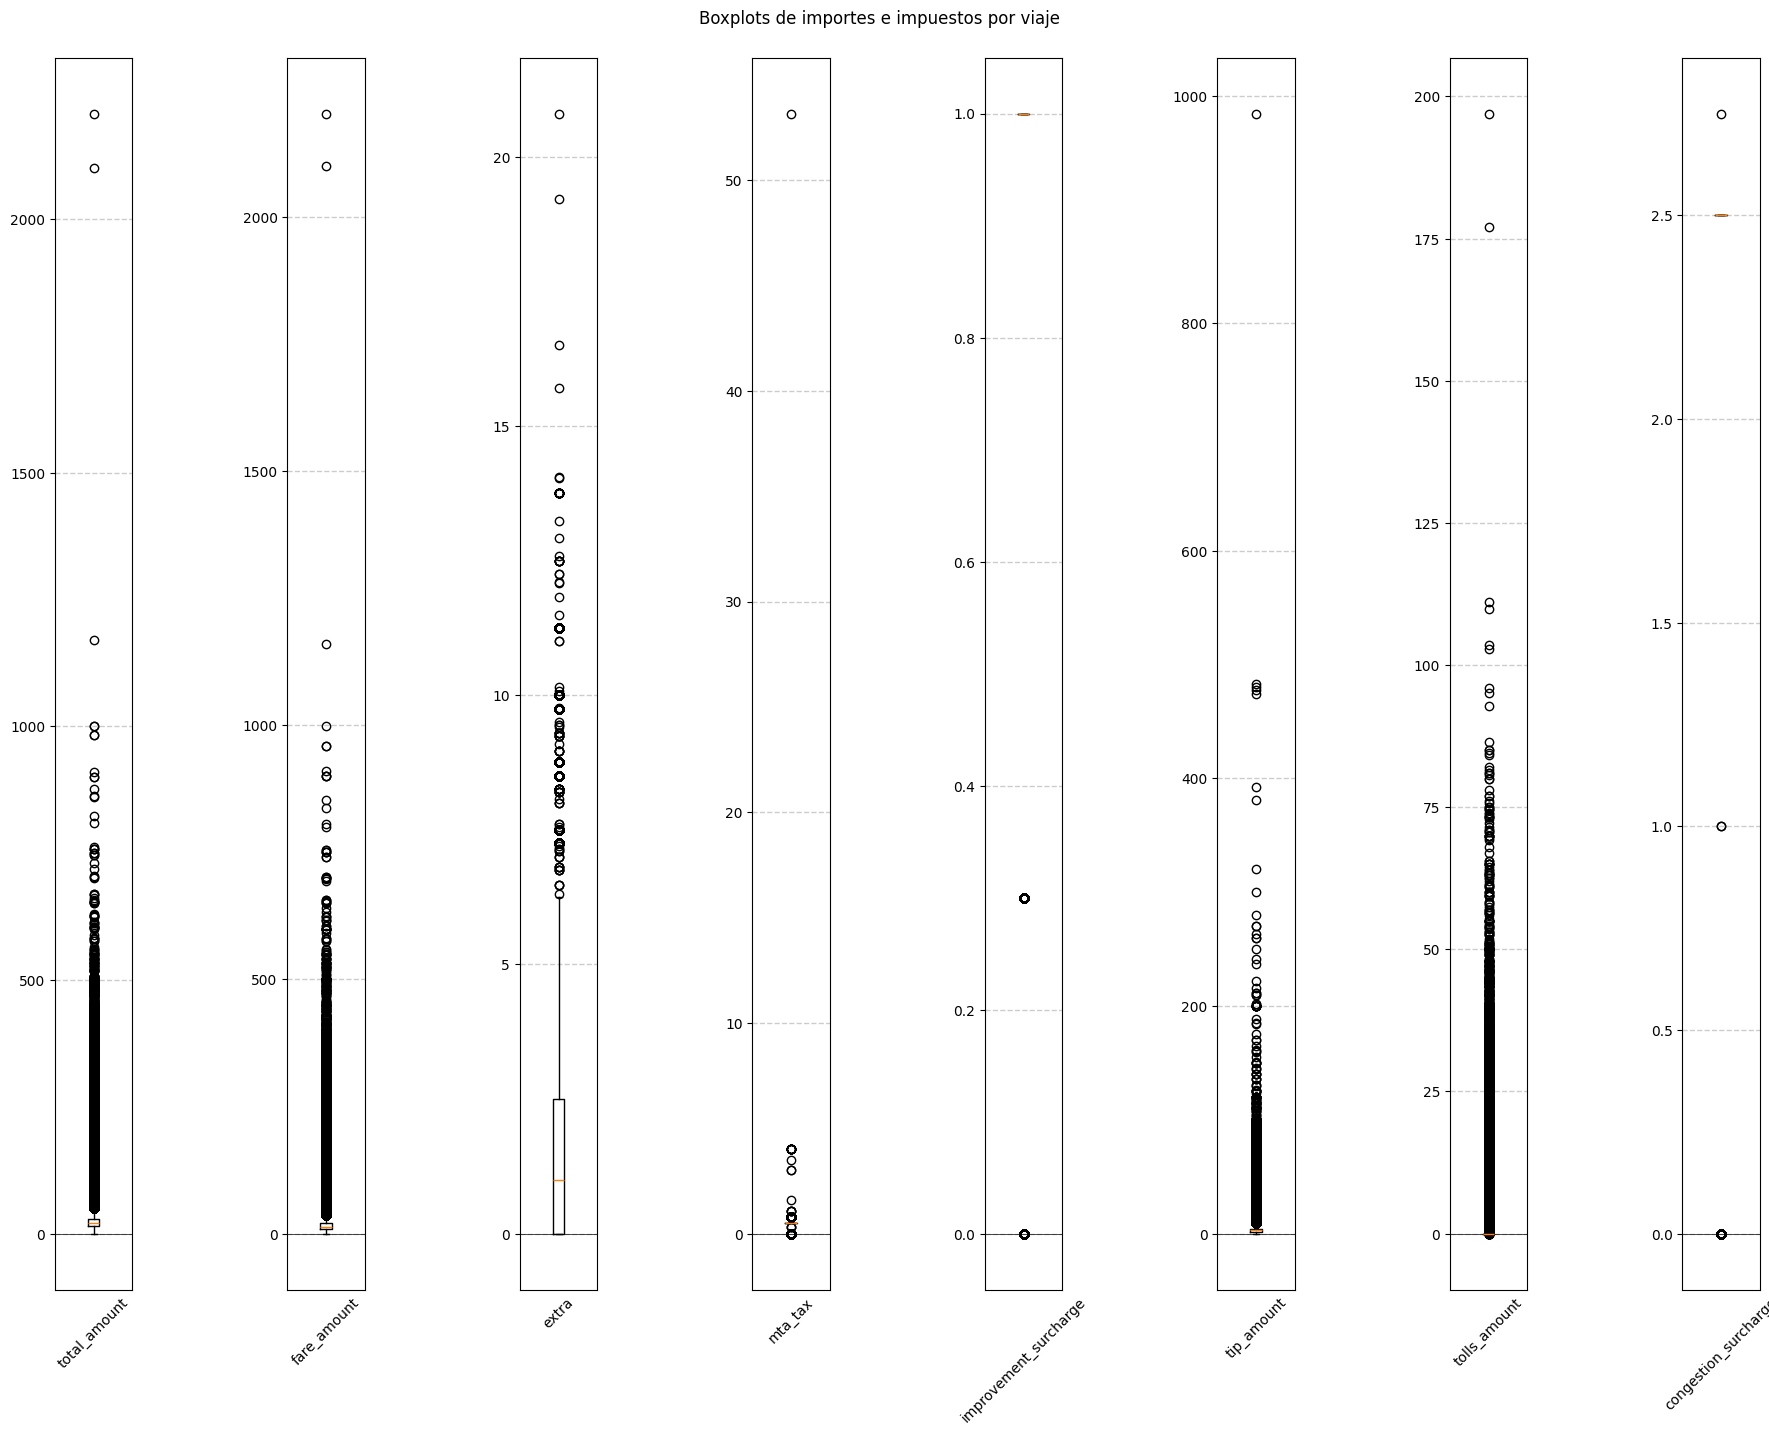

In [104]:
fig = plt.figure(figsize = (22, 16))
fig.subplots_adjust(hspace=0.5, wspace=2)

# Grafica cada columna en un boxplot diferente
for i in range(amount_details_columns.size):
    ax = fig.add_subplot(1, amount_details_columns.size, i+1)
    ax.boxplot(amount_details[amount_details_columns[i]])
    ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.set_xlabel(amount_details_columns[i],rotation = 45)
    ax.set_xticks([])
fig.suptitle("Boxplots de importes e impuestos por viaje",x=0.50,y=0.91)    
plt.show()

Así que vamos a aplicar el método de recorte a cada unos de los importes de forma univariada.

In [105]:
amount_details.describe()

,total_amount,fare_amount,extra,mta_tax,improvement_surcharge,tip_amount,tolls_amount,congestion_surcharge
count,9.382753e+06,9.382753e+06,9.382753e+06,9.382753e+06,9.382753e+06,9.382753e+06,9.382753e+06,9.382753e+06
mean,2.768242e+01,1.884741e+01,1.595131e+00,4.962270e-01,9.986334e-01,3.420511e+00,5.417085e-01,2.317701e+00
std,2.181368e+01,1.753542e+01,1.795657e+00,4.716256e-02,3.274632e-02,3.892677e+00,2.056357e+00,6.500108e-01
min,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+01,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00,0.000000e+00,2.500000e+00
50%,2.047000e+01,1.280000e+01,1.000000e+00,5.000000e-01,1.000000e+00,2.800000e+00,0.000000e+00,2.500000e+00
75%,2.920000e+01,2.050000e+01,2.500000e+00,5.000000e-01,1.000000e+00,4.250000e+00,0.000000e+00,2.500000e+00
max,2.208100e+03,2.203100e+03,2.080000e+01,5.316000e+01,1.000000e+00,9.843000e+02,1.969900e+02,2.750000e+00


In [106]:
# Límites inferior y superior
q1 = 15.6 # cuártil 1
q3 = 29.2 # cuártil 3
iqr =  q3-q1
iqr_lim_inf = q1 - 1.5*iqr
iqr_lim_sup = q3 + 1.5*iqr

# Y realizar el recorte
trip_data.total_amount = np.where(trip_data.total_amount>iqr_lim_sup, iqr_lim_sup, trip_data.total_amount)
trip_data.total_amount = np.where(trip_data.total_amount<iqr_lim_inf, iqr_lim_inf, trip_data.total_amount)

In [107]:
# Límites inferior y superior
q1 = 9.3 # cuártil 1
q3 = 12.8 # cuártil 3
iqr =  q3-q1
iqr_lim_inf = q1 - 1.5*iqr
iqr_lim_sup = q3 + 1.5*iqr

# Y realizar el recorte
trip_data.fare_amount = np.where(trip_data.fare_amount>iqr_lim_sup, iqr_lim_sup, trip_data.fare_amount)
trip_data.fare_amount = np.where(trip_data.fare_amount<iqr_lim_inf, iqr_lim_inf, trip_data.fare_amount)

In [108]:
# Límites inferior y superior
q1 = 0 # cuártil 1
q3 = 2.5 # cuártil 3
iqr =  q3-q1
iqr_lim_inf = q1 - 1.5*iqr
iqr_lim_sup = q3 + 1.5*iqr

# Y realizar el recorte
trip_data.extra = np.where(trip_data.extra>iqr_lim_sup, iqr_lim_sup, trip_data.extra)
trip_data.extra = np.where(trip_data.extra<iqr_lim_inf, iqr_lim_inf, trip_data.extra)

In [109]:
# Límites inferior y superior
q1 = 0.5 # cuártil 1
q3 = 0.5 # cuártil 3
iqr =  q3-q1
iqr_lim_inf = q1 - 1.5*iqr
iqr_lim_sup = q3 + 1.5*iqr

# Y realizar el recorte
trip_data.mta_tax = np.where(trip_data.mta_tax>iqr_lim_sup, iqr_lim_sup, trip_data.mta_tax)
trip_data.mta_tax = np.where(trip_data.mta_tax<iqr_lim_inf, iqr_lim_inf, trip_data.mta_tax)

In [110]:
# Límites inferior y superior
q1 = 1 # cuártil 1
q3 = 1 # cuártil 3
iqr =  q3-q1
iqr_lim_inf = q1 - 1.5*iqr
iqr_lim_sup = q3 + 1.5*iqr

# Y realizar el recorte
trip_data.improvement_surcharge = np.where(trip_data.improvement_surcharge>iqr_lim_sup, iqr_lim_sup, trip_data.improvement_surcharge)
trip_data.improvement_surcharge = np.where(trip_data.improvement_surcharge<iqr_lim_inf, iqr_lim_inf, trip_data.improvement_surcharge)

In [111]:
# Límites inferior y superior
q1 = 1 # cuártil 1
q3 = 4.25 # cuártil 3
iqr =  q3-q1
iqr_lim_inf = q1 - 1.5*iqr
iqr_lim_sup = q3 + 1.5*iqr

# Y realizar el recorte
trip_data.tip_amount = np.where(trip_data.tip_amount>iqr_lim_sup, iqr_lim_sup, trip_data.tip_amount)
trip_data.tip_amount = np.where(trip_data.tip_amount<iqr_lim_inf, iqr_lim_inf, trip_data.tip_amount)

In [112]:
# Límites inferior y superior
q1 = 0 # cuártil 1
q3 = 0 # cuártil 3
iqr =  q3-q1
iqr_lim_inf = q1 - 1.5*iqr
iqr_lim_sup = q3 + 1.5*iqr

# Y realizar el recorte
trip_data.tolls_amount = np.where(trip_data.tolls_amount>iqr_lim_sup, iqr_lim_sup, trip_data.tolls_amount)
trip_data.tolls_amount = np.where(trip_data.tolls_amount<iqr_lim_inf, iqr_lim_inf, trip_data.tolls_amount)

In [113]:
# Límites inferior y superior
q1 = 2.5 # cuártil 1
q3 = 2.5 # cuártil 3
iqr =  q3-q1
iqr_lim_inf = q1 - 1.5*iqr
iqr_lim_sup = q3 + 1.5*iqr

# Y realizar el recorte
trip_data.congestion_surcharge = np.where(trip_data.congestion_surcharge>iqr_lim_sup, iqr_lim_sup, trip_data.congestion_surcharge)
trip_data.congestion_surcharge = np.where(trip_data.congestion_surcharge<iqr_lim_inf, iqr_lim_inf, trip_data.congestion_surcharge)

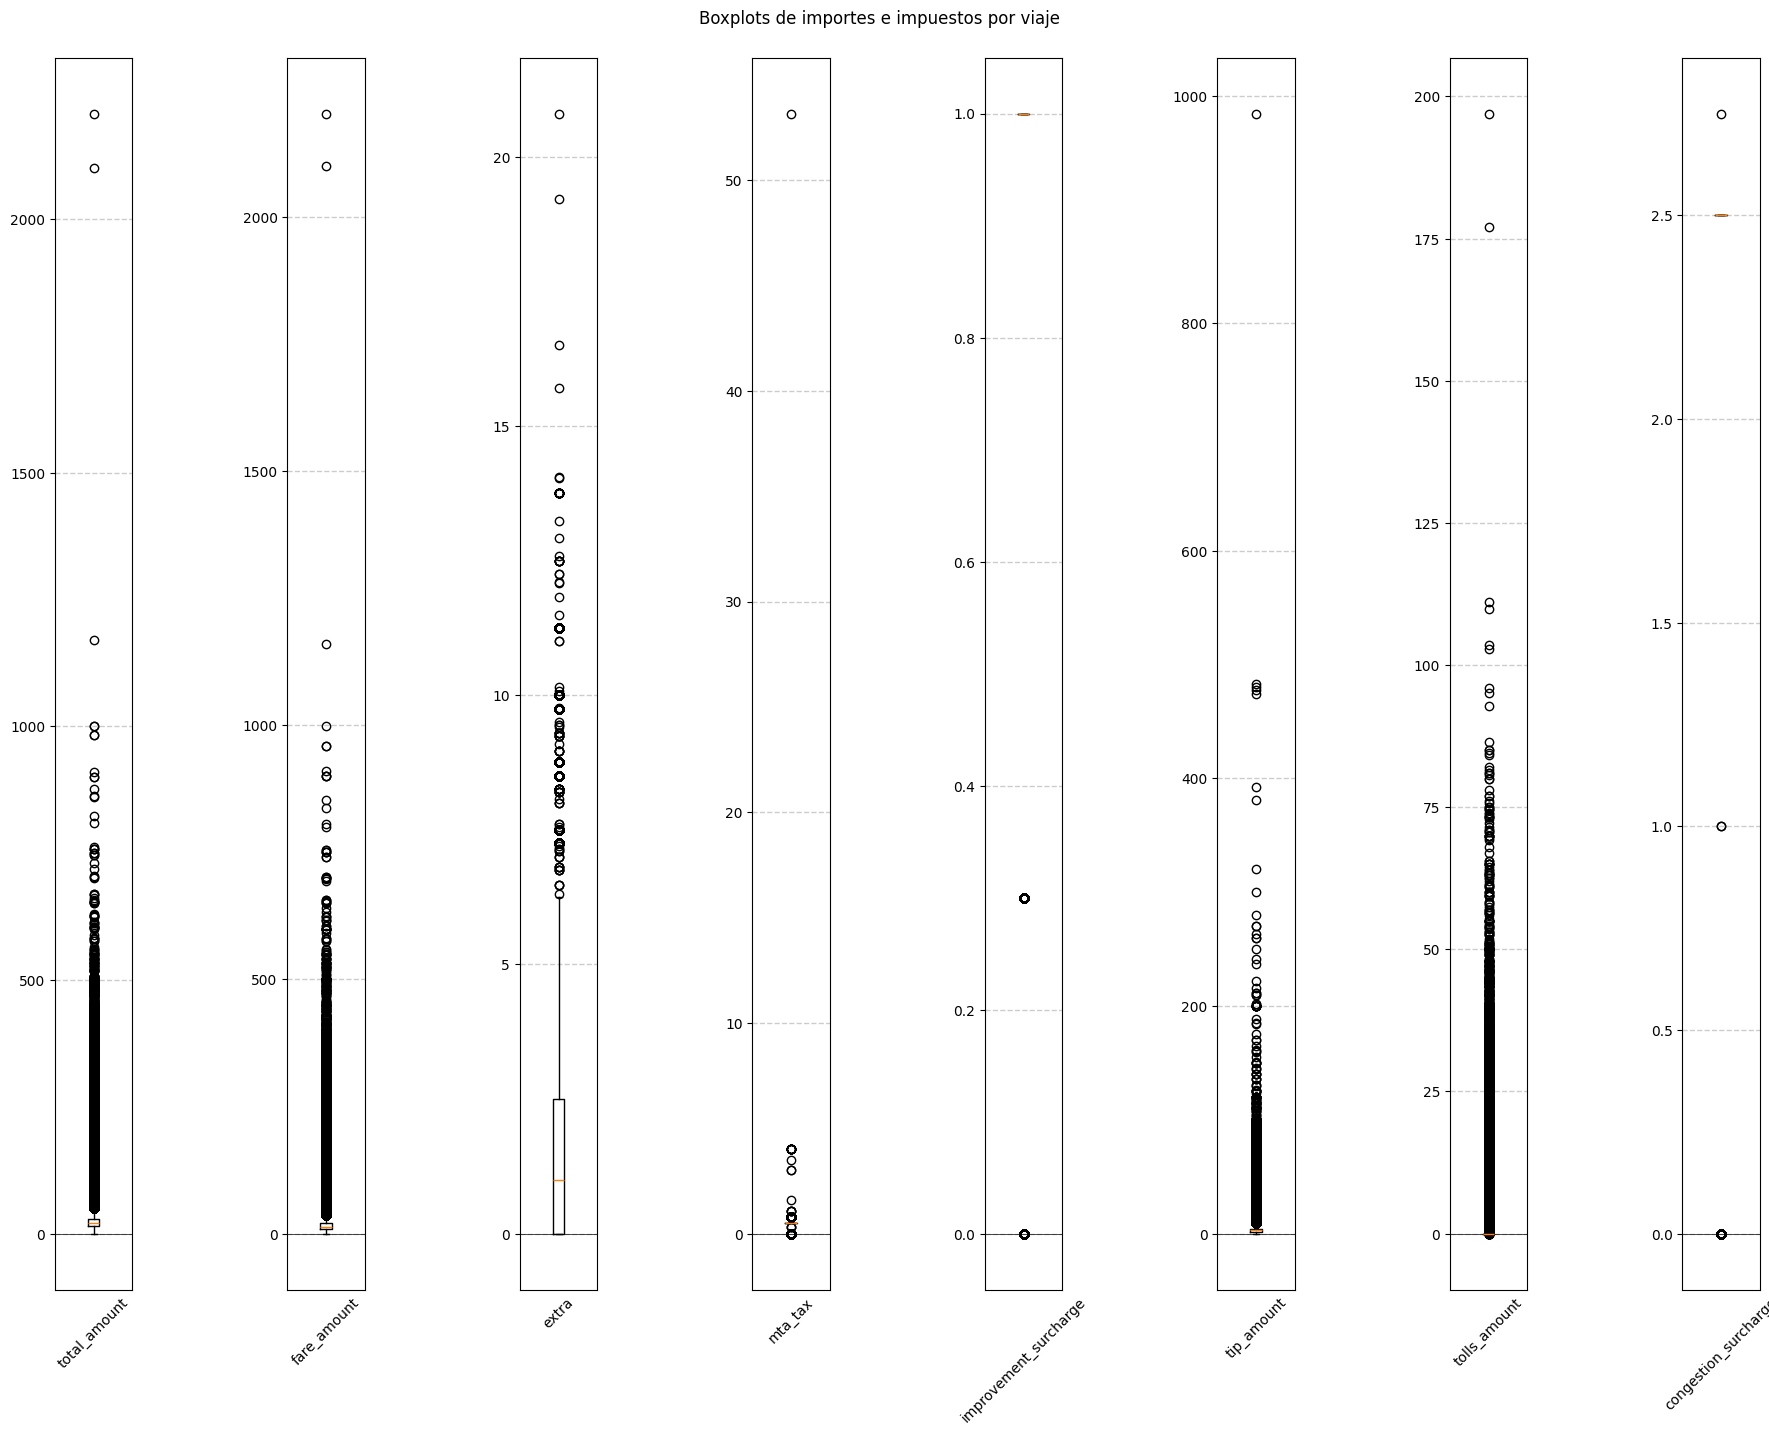

In [114]:
fig = plt.figure(figsize = (22, 16))
fig.subplots_adjust(hspace=0.5, wspace=2)

# Grafica cada columna en un boxplot diferente
for i in range(amount_details_columns.size):
    ax = fig.add_subplot(1, amount_details_columns.size, i+1)
    ax.boxplot(amount_details[amount_details_columns[i]])
    ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.set_xlabel(amount_details_columns[i],rotation = 45)
    ax.set_xticks([])
fig.suptitle("Boxplots de importes e impuestos por viaje",x=0.50,y=0.91)    
plt.show()

In [115]:
del amount_details
del amount_details_columns
# Perform garbage collection
gc.collect()

46054

Para el feature passenger_count vimos que hay más de 6 pasajeros por viaje, es un caso extremo que se puede dar en pocos casos donde el taxi es un tipo de vehículo de camioneta y pueden entrar más de 6 pasajeros.

In [116]:
passenger_count_df = trip_data.loc[trip_data.passenger_count > 6, :]
passenger_count_df

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,weekday,dayofweek,payment_type_name,vendor_description,ratecode_description
1004089,1004089,2,2023-01-12 09:32:39,2023-01-12 09:32:49,8,0.000000,5.0,N,249,249,...,9.125,0.0,1.0,49.60,2.5,Jueves,3,Efectivo,VeriFone Inc.,Tarifa negociada
1288792,1288792,2,2023-01-14 20:06:39,2023-01-14 20:07:32,7,0.000000,5.0,N,265,265,...,0.000,0.0,1.0,49.60,2.5,Sábado,5,Efectivo,VeriFone Inc.,Tarifa negociada
1381009,1381009,2,2023-01-15 18:39:09,2023-01-15 18:39:39,8,0.305775,5.0,N,141,237,...,6.000,0.0,1.0,49.60,2.5,Domingo,6,Efectivo,VeriFone Inc.,Tarifa negociada
1388796,1388796,2,2023-01-15 19:54:09,2023-01-15 20:17:27,7,16.817603,5.0,N,93,249,...,9.125,0.0,1.0,49.60,2.5,Domingo,6,Efectivo,VeriFone Inc.,Tarifa negociada
1391519,1391519,2,2023-01-15 20:38:45,2023-01-15 21:15:42,8,31.687905,5.0,N,132,137,...,8.400,0.0,1.0,49.60,2.5,Domingo,6,Efectivo,VeriFone Inc.,Tarifa negociada
1427207,1427207,2,2023-01-16 11:54:03,2023-01-16 11:54:10,8,0.000000,5.0,N,132,132,...,9.125,0.0,1.0,49.60,2.5,Lunes,0,Efectivo,VeriFone Inc.,Tarifa negociada
1442234,1442234,2,2023-01-16 14:43:41,2023-01-16 14:43:53,8,0.337961,5.0,N,74,74,...,9.125,0.0,1.0,49.60,2.5,Lunes,0,Efectivo,VeriFone Inc.,Tarifa negociada
1461868,1461868,2,2023-01-16 17:24:29,2023-01-16 17:24:34,8,0.000000,5.0,N,132,132,...,9.125,0.0,1.0,49.60,2.5,Lunes,0,Efectivo,VeriFone Inc.,Tarifa negociada
1522662,1522662,2,2023-01-17 13:27:44,2023-01-17 13:27:50,8,0.000000,5.0,N,132,132,...,9.125,0.0,1.0,49.60,2.5,Martes,1,Efectivo,VeriFone Inc.,Tarifa negociada
1543375,1543375,2,2023-01-17 16:35:31,2023-01-17 16:35:39,8,0.000000,5.0,N,132,132,...,9.125,0.0,1.0,49.60,2.5,Martes,1,Efectivo,VeriFone Inc.,Tarifa negociada


Son sólo 55 rows, por lo que vamos a aplicar el método de eliminación.

In [117]:
trip_data = trip_data.loc[trip_data.passenger_count <= 6, :]

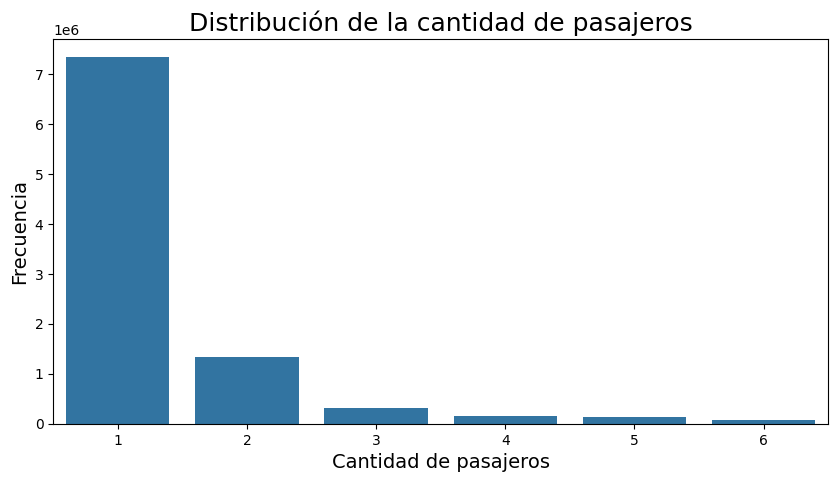

In [118]:
# Graficamos la distribución de la variable cuantitativa passenger_count
plt.figure(figsize=(10,5))
passenger_count_plt = sns.countplot(x='passenger_count', data=trip_data, order=[1,2,3,4,5,6])
passenger_count_plt.set_title('Distribución de la cantidad de pasajeros', size=18)
passenger_count_plt.set_ylabel('Frecuencia', size=14)
passenger_count_plt.set_xlabel('Cantidad de pasajeros', size=14)
plt.show()

In [119]:
del passenger_count_df
# Perform garbage collection
gc.collect()

151

Para el feature de trip_distance vimos que hay viajes muy largos, más de 100000km donde en EEUU la distancia más larga entre ciudades es de aprox 5000km. Por lo tanto, los viajes que superen dicha distancia las consideramos mal cargadas.

In [120]:
trip_distance_df = trip_data.loc[trip_data.trip_distance > 5000, :]
trip_distance_df

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,weekday,dayofweek,payment_type_name,vendor_description,ratecode_description
62642,62642,2,2023-01-01 19:40:43,2023-01-01 20:21:48,1,100357.669917,4.0,N,79,48,...,0.000,0.0,1.0,2.50,2.5,Domingo,6,Sin cargo,VeriFone Inc.,Nassau o Westchester
185956,185956,2,2023-01-03 15:25:05,2023-01-03 16:09:02,1,15579.392897,1.0,N,264,244,...,9.125,0.0,1.0,49.60,2.5,Martes,1,Efectivo,VeriFone Inc.,Tarifa estándar
367146,367146,2,2023-01-05 15:26:43,2023-01-05 16:04:17,1,15577.976678,1.0,N,264,244,...,9.125,0.0,1.0,49.60,2.5,Jueves,3,Efectivo,VeriFone Inc.,Tarifa estándar
745281,745281,2,2023-01-09 15:44:58,2023-01-09 16:02:35,1,15569.833418,1.0,N,264,239,...,0.000,0.0,1.0,19.20,2.5,Lunes,0,Sin cargo,VeriFone Inc.,Tarifa estándar
1034794,1034794,2,2023-01-12 15:52:48,2023-01-12 16:03:55,1,15568.207984,1.0,N,264,140,...,3.000,0.0,1.0,19.10,2.5,Jueves,3,Efectivo,VeriFone Inc.,Tarifa estándar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9377923,3397202,2,2023-03-29 20:18:00,2023-03-29 20:37:00,1,18392.487031,1.0,N,249,50,...,0.000,0.0,1.0,18.16,2.5,Miércoles,2,Tarjeta de crédito,VeriFone Inc.,Tarifa estándar
9378864,3398143,2,2023-03-30 07:02:00,2023-03-30 07:15:00,1,31812.113461,1.0,N,158,161,...,3.030,0.0,1.0,23.20,2.5,Jueves,3,Tarjeta de crédito,VeriFone Inc.,Tarifa estándar
9379893,3399172,2,2023-03-30 14:07:00,2023-03-30 15:32:00,1,19526.556742,1.0,N,50,132,...,9.125,0.0,1.0,49.60,2.5,Jueves,3,Tarjeta de crédito,VeriFone Inc.,Tarifa estándar
9381163,3400442,2,2023-03-30 21:43:00,2023-03-31 17:13:00,1,91026.056767,1.0,N,161,193,...,0.000,0.0,1.0,21.30,2.5,Jueves,3,Tarjeta de crédito,VeriFone Inc.,Tarifa estándar


Son 219 rows, por lo tanto tomamos la decisión de eliminar los registros ya que sólo reprensetan el 0.0023% del dataset y no influye demasiado.

In [121]:
trip_data = trip_data.loc[trip_data.trip_distance <= 5000, :]

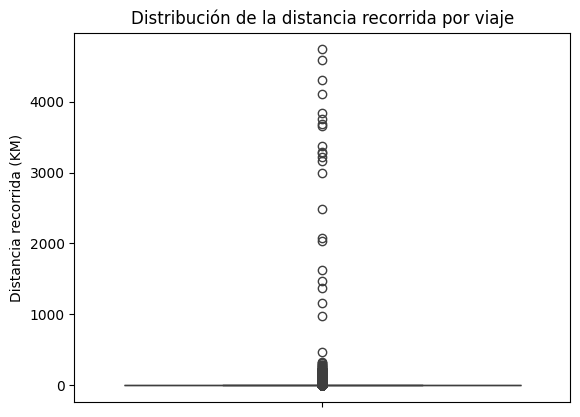

In [122]:
# Graficamos la distribucion de la variable trip_distance
sns.boxplot(y=trip_data.trip_distance)\
   .set(
        title='Distribución de la distancia recorrida por viaje',
        xlabel='', 
        ylabel='Distancia recorrida (KM)'
   )
plt.show()

Ahora vamos a analizar si los casos extremos (más de 100 km) son muy frecuentes y aplicamos el método de eliminación o recorte.

In [123]:
trip_distance_df = trip_data.loc[trip_data.trip_distance > 100, :]
trip_distance_df

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,weekday,dayofweek,payment_type_name,vendor_description,ratecode_description
45939,45939,2,2023-01-01 15:17:25,2023-01-01 17:09:49,1,169.865837,5.0,N,132,265,...,0.000,0.0,1.0,49.60,2.5,Domingo,6,Efectivo,VeriFone Inc.,Tarifa negociada
46747,46747,2,2023-01-01 15:09:45,2023-01-01 16:32:14,1,106.892363,4.0,N,48,265,...,0.000,0.0,1.0,49.60,2.5,Domingo,6,Sin cargo,VeriFone Inc.,Nassau o Westchester
50620,50620,2,2023-01-01 16:51:52,2023-01-01 19:03:38,3,132.078534,5.0,N,186,265,...,0.000,0.0,1.0,49.60,2.5,Domingo,6,Sin cargo,VeriFone Inc.,Tarifa negociada
50621,50621,2,2023-01-01 16:51:52,2023-01-01 19:03:38,3,132.078534,5.0,N,186,265,...,0.000,0.0,1.0,49.60,2.5,Domingo,6,Sin cargo,VeriFone Inc.,Tarifa negociada
73225,73225,2,2023-01-01 23:43:47,2023-01-02 01:18:04,1,120.088951,5.0,N,132,265,...,5.000,0.0,1.0,49.60,2.5,Domingo,6,Efectivo,VeriFone Inc.,Tarifa negociada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9297321,3316600,2,2023-03-01 07:57:00,2023-03-01 08:22:00,1,3375.655024,1.0,N,52,233,...,6.370,0.0,1.0,38.23,2.5,Miércoles,2,Tarjeta de crédito,VeriFone Inc.,Tarifa estándar
9315986,3335265,2,2023-03-07 17:59:45,2023-03-07 20:26:03,1,100.728591,1.0,N,161,265,...,9.125,0.0,1.0,49.60,2.5,Martes,1,Tarjeta de crédito,VeriFone Inc.,Tarifa estándar
9317845,3337124,2,2023-03-08 16:08:00,2023-03-08 16:18:00,1,2072.749453,1.0,N,238,166,...,3.430,0.0,1.0,18.80,2.5,Miércoles,2,Tarjeta de crédito,VeriFone Inc.,Tarifa estándar
9324026,3343305,2,2023-03-10 19:26:00,2023-03-10 19:35:00,1,1367.246984,1.0,N,50,246,...,2.560,0.0,1.0,19.64,2.5,Viernes,4,Tarjeta de crédito,VeriFone Inc.,Tarifa estándar


Son 429 rows que vamos a aplicar el recorte para no perder información.

In [124]:
trip_distance_df.trip_distance.describe()

count     428.000000
mean      275.828580
std       676.495754
min       100.004388
25%       107.375165
50%       116.403562
75%       142.269679
max      4736.174966
Name: trip_distance, dtype: float64

In [125]:
# Límites inferior y superior
q1 = 107.42 # cuártil 1
q3 = 142.04 # cuártil 3
iqr =  q3-q1
iqr_lim_inf = q1 - 1.5*iqr
iqr_lim_sup = q3 + 1.5*iqr

# Y realizar el recorte
trip_data.trip_distance = np.where(trip_data.trip_distance>iqr_lim_sup, iqr_lim_sup, trip_data.trip_distance)
trip_data.trip_distance = np.where(trip_data.trip_distance<iqr_lim_inf, iqr_lim_inf, trip_data.trip_distance)

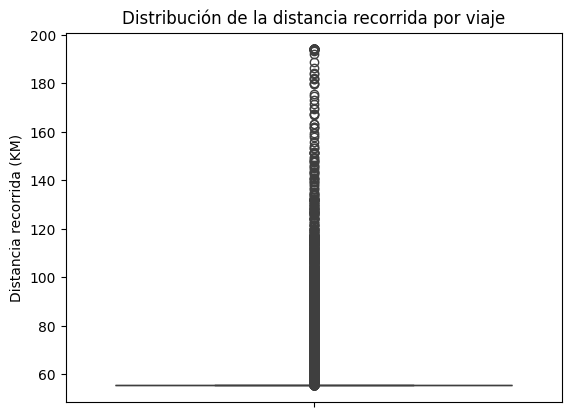

In [126]:
# Graficamos la distribucion de la variable trip_distance
sns.boxplot(y=trip_data.trip_distance)\
   .set(
        title='Distribución de la distancia recorrida por viaje',
        xlabel='', 
        ylabel='Distancia recorrida (KM)'
   )
plt.show()

In [127]:
del trip_distance_df
# Perform garbage collection
gc.collect()

5624

## d) Nuevos Features

Además de los features weekday, weekofday, payment_type_name, vendor_description y ratecode_description, vamos a crear un feature cualitativo "month" y otro cuantitativo "duration_in_minutes" que sería la duración del viaje desde la hora de salida y llegada en minutos.

In [128]:
trip_data['month'] = trip_data.tpep_dropoff_datetime.dt.month
trip_data['month'] = trip_data.month.apply(lambda x: 'Enero' if x == 1 else ('Febrero' if x == 2 else 'Marzo'))

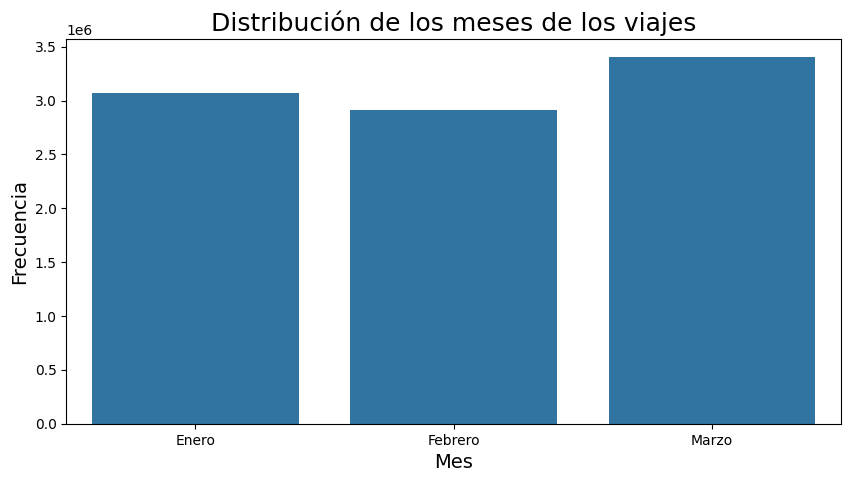

In [129]:
# Graficamos la distribución de la variable cualitativa month
plt.figure(figsize=(10,5))
month_count_plt = sns.countplot(x='month', data=trip_data, order=['Enero','Febrero','Marzo'])
month_count_plt.set_title('Distribución de los meses de los viajes', size=18)
month_count_plt.set_ylabel('Frecuencia', size=14)
month_count_plt.set_xlabel('Mes', size=14)
plt.show()

In [130]:
del month_count_plt
# Perform garbage collection
gc.collect()

139

In [131]:
trip_data['duration_in_minutes'] = (trip_data.tpep_dropoff_datetime - trip_data.tpep_pickup_datetime) / pd.Timedelta(minutes=1)
trip_data.duration_in_minutes.describe()

count    9.382479e+06
mean     1.621669e+01
std      4.308589e+01
min     -4.762500e+02
25%      7.266667e+00
50%      1.183333e+01
75%      1.893333e+01
max      1.002918e+04
Name: duration_in_minutes, dtype: float64

Como el valor mínimo es negativo, vamos a ver cuáles son los casos (mal cargados) donde la fecha de llegada es menor o igual a la de salida.

In [132]:
duration_df = trip_data.loc[((trip_data.tpep_dropoff_datetime - trip_data.tpep_pickup_datetime) / pd.Timedelta(minutes=1)) <= 0, :]
duration_df

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,improvement_surcharge,total_amount,congestion_surcharge,weekday,dayofweek,payment_type_name,vendor_description,ratecode_description,month,duration_in_minutes
4971,4971,1,2023-01-01 01:54:01,2023-01-01 01:54:01,1,55.49,1.0,N,237,264,...,1.0,8.0,2.5,Domingo,6,Sin cargo,"Creative Mobile Technologies, LLC.",Tarifa estándar,Enero,0.000000
11648,11648,1,2023-01-01 02:45:08,2023-01-01 02:45:08,1,55.49,1.0,N,234,264,...,1.0,8.0,2.5,Domingo,6,Sin cargo,"Creative Mobile Technologies, LLC.",Tarifa estándar,Enero,0.000000
15664,15664,1,2023-01-01 03:55:38,2023-01-01 03:55:38,1,55.49,1.0,N,48,264,...,1.0,8.0,2.5,Domingo,6,Sin cargo,"Creative Mobile Technologies, LLC.",Tarifa estándar,Enero,0.000000
22644,22644,1,2023-01-01 07:24:56,2023-01-01 07:24:56,1,55.49,1.0,Y,116,264,...,1.0,14.7,2.5,Domingo,6,Sin cargo,"Creative Mobile Technologies, LLC.",Tarifa estándar,Enero,0.000000
28848,28848,1,2023-01-01 11:54:51,2023-01-01 11:54:51,1,55.49,1.0,N,230,264,...,1.0,7.0,2.5,Domingo,6,Sin cargo,"Creative Mobile Technologies, LLC.",Tarifa estándar,Enero,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9383464,3402743,2,2023-03-31 18:03:30,2023-03-31 18:03:23,1,55.49,1.0,N,265,237,...,1.0,19.0,2.5,Viernes,4,Tarjeta de crédito,VeriFone Inc.,Tarifa estándar,Marzo,-0.116667
9383525,3402804,2,2023-03-31 18:03:49,2023-03-31 18:03:26,1,55.49,1.0,N,265,81,...,1.0,49.6,2.5,Viernes,4,Tarjeta de crédito,VeriFone Inc.,Tarifa estándar,Marzo,-0.383333
9383864,3403143,2,2023-03-31 19:03:52,2023-03-31 19:03:22,1,55.49,1.0,N,265,232,...,1.0,45.0,2.5,Viernes,4,Tarjeta de crédito,VeriFone Inc.,Tarifa estándar,Marzo,-0.500000
9383978,3403257,2,2023-03-31 20:03:53,2023-03-31 20:03:07,1,55.49,1.0,N,265,130,...,1.0,49.6,2.5,Viernes,4,Tarjeta de crédito,VeriFone Inc.,Tarifa estándar,Marzo,-0.766667


Son 3630 rows con las fechas incorrectas, así que las vamos a eliminar ya que son pocas y no influyen demasiado en el análisis.

In [133]:
del duration_df
# Perform garbage collection
gc.collect()

2683

In [134]:
trip_data = trip_data.loc[((trip_data.tpep_dropoff_datetime - trip_data.tpep_pickup_datetime) / pd.Timedelta(minutes=1)) > 0, :]

In [135]:
trip_data.duration_in_minutes = (trip_data.tpep_dropoff_datetime - trip_data.tpep_pickup_datetime) / pd.Timedelta(minutes=1)
trip_data.duration_in_minutes.describe()

count    9.378849e+06
mean     1.622309e+01
std      4.309269e+01
min      1.666667e-02
25%      7.266667e+00
50%      1.183333e+01
75%      1.893333e+01
max      1.002918e+04
Name: duration_in_minutes, dtype: float64

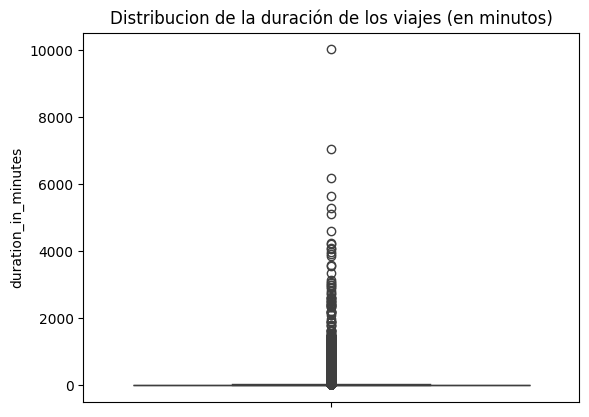

In [136]:
# Graficamos la distribucion de la variable congestion_surcharge
sns.boxplot(y=trip_data.duration_in_minutes).set(title='Distribucion de la duración de los viajes (en minutos)')
plt.show()

Ahora analizando los extremos, notamos que viajes que superen los 1500 min, que representa aprox. 1 día de viaje sin descanso como máximo, vamos a aplicar el método de recorte de outliers.

In [137]:
duration_in_minutes_df = trip_data.loc[trip_data.duration_in_minutes > 1500, :]
duration_in_minutes_df

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,improvement_surcharge,total_amount,congestion_surcharge,weekday,dayofweek,payment_type_name,vendor_description,ratecode_description,month,duration_in_minutes
59232,59232,2,2023-01-01 18:45:20,2023-01-03 14:01:32,1,55.49,1.0,N,132,132,...,1.0,41.45,2.5,Domingo,6,Sin cargo,VeriFone Inc.,Tarifa estándar,Enero,2596.200000
59233,59233,2,2023-01-01 18:45:20,2023-01-03 14:01:58,1,55.49,1.0,N,138,138,...,1.0,10.75,2.5,Domingo,6,Desconocido,VeriFone Inc.,Tarifa estándar,Enero,2596.633333
59234,59234,2,2023-01-01 18:45:20,2023-01-03 14:01:58,1,55.49,1.0,N,138,138,...,1.0,10.75,2.5,Domingo,6,Desconocido,VeriFone Inc.,Tarifa estándar,Enero,2596.633333
322911,322911,2,2023-01-05 07:21:50,2023-01-06 19:17:25,2,55.49,1.0,N,48,48,...,1.0,28.25,2.5,Jueves,3,Efectivo,VeriFone Inc.,Tarifa estándar,Enero,2155.583333
322912,322912,2,2023-01-05 07:21:50,2023-01-06 19:52:25,1,55.49,1.0,N,138,161,...,1.0,49.60,2.5,Jueves,3,Sin cargo,VeriFone Inc.,Tarifa estándar,Enero,2190.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8530410,2549689,2,2023-03-24 19:30:30,2023-03-28 11:34:03,1,55.49,5.0,N,162,265,...,1.0,18.70,2.5,Viernes,4,Sin cargo,VeriFone Inc.,Tarifa negociada,Marzo,5283.550000
8558414,2577693,2,2023-03-24 23:09:55,2023-03-27 11:00:45,2,55.49,1.0,N,68,170,...,1.0,20.30,2.5,Viernes,4,Sin cargo,VeriFone Inc.,Tarifa estándar,Marzo,3590.833333
8560057,2579336,2,2023-03-24 23:09:55,2023-03-27 10:41:19,2,55.49,1.0,N,114,114,...,1.0,21.30,2.5,Viernes,4,Sin cargo,VeriFone Inc.,Tarifa estándar,Marzo,3571.400000
8724409,2743688,2,2023-03-26 15:18:05,2023-03-28 09:08:24,1,55.49,1.0,N,141,141,...,1.0,7.00,2.5,Domingo,6,Sin cargo,VeriFone Inc.,Tarifa estándar,Marzo,2510.316667


In [138]:
del duration_in_minutes_df
# Perform garbage collection
gc.collect()

135

In [139]:
trip_data.duration_in_minutes.describe()

count    9.378849e+06
mean     1.622309e+01
std      4.309269e+01
min      1.666667e-02
25%      7.266667e+00
50%      1.183333e+01
75%      1.893333e+01
max      1.002918e+04
Name: duration_in_minutes, dtype: float64

In [140]:
# Límites inferior y superior
q1 = 7.2 # cuártil 1
q3 = 18.9 # cuártil 3
iqr =  q3-q1
iqr_lim_inf = q1 - 1.5*iqr
iqr_lim_sup = q3 + 1.5*iqr

# Y realizar el recorte
trip_data.duration_in_minutes = np.where(trip_data.duration_in_minutes>iqr_lim_sup, iqr_lim_sup, trip_data.duration_in_minutes)
trip_data.duration_in_minutes = np.where(trip_data.duration_in_minutes<iqr_lim_inf, iqr_lim_inf, trip_data.duration_in_minutes)
trip_data.duration_in_minutes = pd.Series(trip_data.duration_in_minutes)

In [141]:
trip_data.duration_in_minutes.describe()

count    9.378849e+06
mean     1.424373e+01
std      9.266143e+00
min      1.666667e-02
25%      7.266667e+00
50%      1.183333e+01
75%      1.893333e+01
max      3.645000e+01
Name: duration_in_minutes, dtype: float64

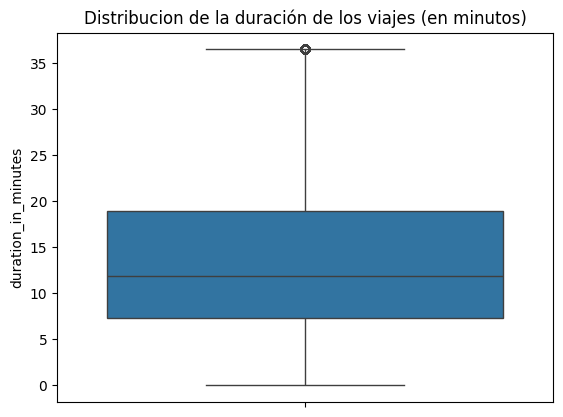

In [142]:
# Graficamos la distribucion de la variable congestion_surcharge
sns.boxplot(y=trip_data.duration_in_minutes).set(title='Distribucion de la duración de los viajes (en minutos)')
plt.show()

El tiempo promedio de un viaje es de aprox. 14 minutos (cuártil 1: 7 min, cuártil 2: 12 min y cuártil 3: 19 min).

## e) Preguntas de investigación

● ¿Cantidad de viajes por distancia y duración, respecto al mes de llegada?

● ¿Cantidad de viajes por hora y día de la semana de llegada?

● ¿Cómo es la distribución de los viajes por tipo de pago, respecto del día de la semana de llegada?

● ¿Cómo son los viajes por el proveedor de TPEP que proporcionó el registro y tipo de pago?

● ¿Cuál es el flujo del importe total según el tipo de pago en el transcurso del día de la semana?

● ¿Cuál es el flujo del importe total según la cantidad de pasajeros en el transcurso del día de la semana?

In [143]:
trip_data.columns

Index(['index', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'weekday', 'dayofweek',
       'payment_type_name', 'vendor_description', 'ratecode_description',
       'month', 'duration_in_minutes'],
      dtype='object')

In [144]:
trip_data

,index,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,improvement_surcharge,total_amount,congestion_surcharge,weekday,dayofweek,payment_type_name,vendor_description,ratecode_description,month,duration_in_minutes
0,0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1,55.49,1.0,N,161,141,...,1.0,14.30,2.5,Domingo,6,Sin cargo,VeriFone Inc.,Tarifa estándar,Enero,8.433333
1,1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1,55.49,1.0,N,43,237,...,1.0,16.90,2.5,Domingo,6,Efectivo,VeriFone Inc.,Tarifa estándar,Enero,6.316667
2,2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1,55.49,1.0,N,48,238,...,1.0,34.90,2.5,Domingo,6,Efectivo,VeriFone Inc.,Tarifa estándar,Enero,12.750000
3,3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,1,55.49,1.0,N,138,7,...,1.0,20.85,2.5,Domingo,6,Efectivo,"Creative Mobile Technologies, LLC.",Tarifa estándar,Enero,9.616667
4,4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1,55.49,1.0,N,107,79,...,1.0,19.68,2.5,Domingo,6,Efectivo,VeriFone Inc.,Tarifa estándar,Enero,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9384482,3403761,2,2023-03-31 23:24:25,2023-03-31 23:40:54,1,55.49,1.0,N,163,75,...,1.0,20.36,2.5,Viernes,4,Tarjeta de crédito,VeriFone Inc.,Tarifa estándar,Marzo,16.483333
9384483,3403762,2,2023-03-31 23:24:50,2023-04-01 00:04:12,1,55.49,1.0,N,125,198,...,1.0,49.60,2.5,Viernes,4,Tarjeta de crédito,VeriFone Inc.,Tarifa estándar,Marzo,36.450000
9384484,3403763,2,2023-03-31 23:26:31,2023-03-31 23:49:39,1,55.49,1.0,N,50,224,...,1.0,28.02,2.5,Viernes,4,Tarjeta de crédito,VeriFone Inc.,Tarifa estándar,Marzo,23.133333
9384485,3403764,2,2023-03-31 23:07:51,2023-03-31 23:15:56,1,55.49,1.0,N,113,158,...,1.0,16.01,2.5,Viernes,4,Tarjeta de crédito,VeriFone Inc.,Tarifa estándar,Marzo,8.083333


## f) Visualización de los datos

● ¿Cantidad de viajes por distancia y duración, respecto al mes de llegada?

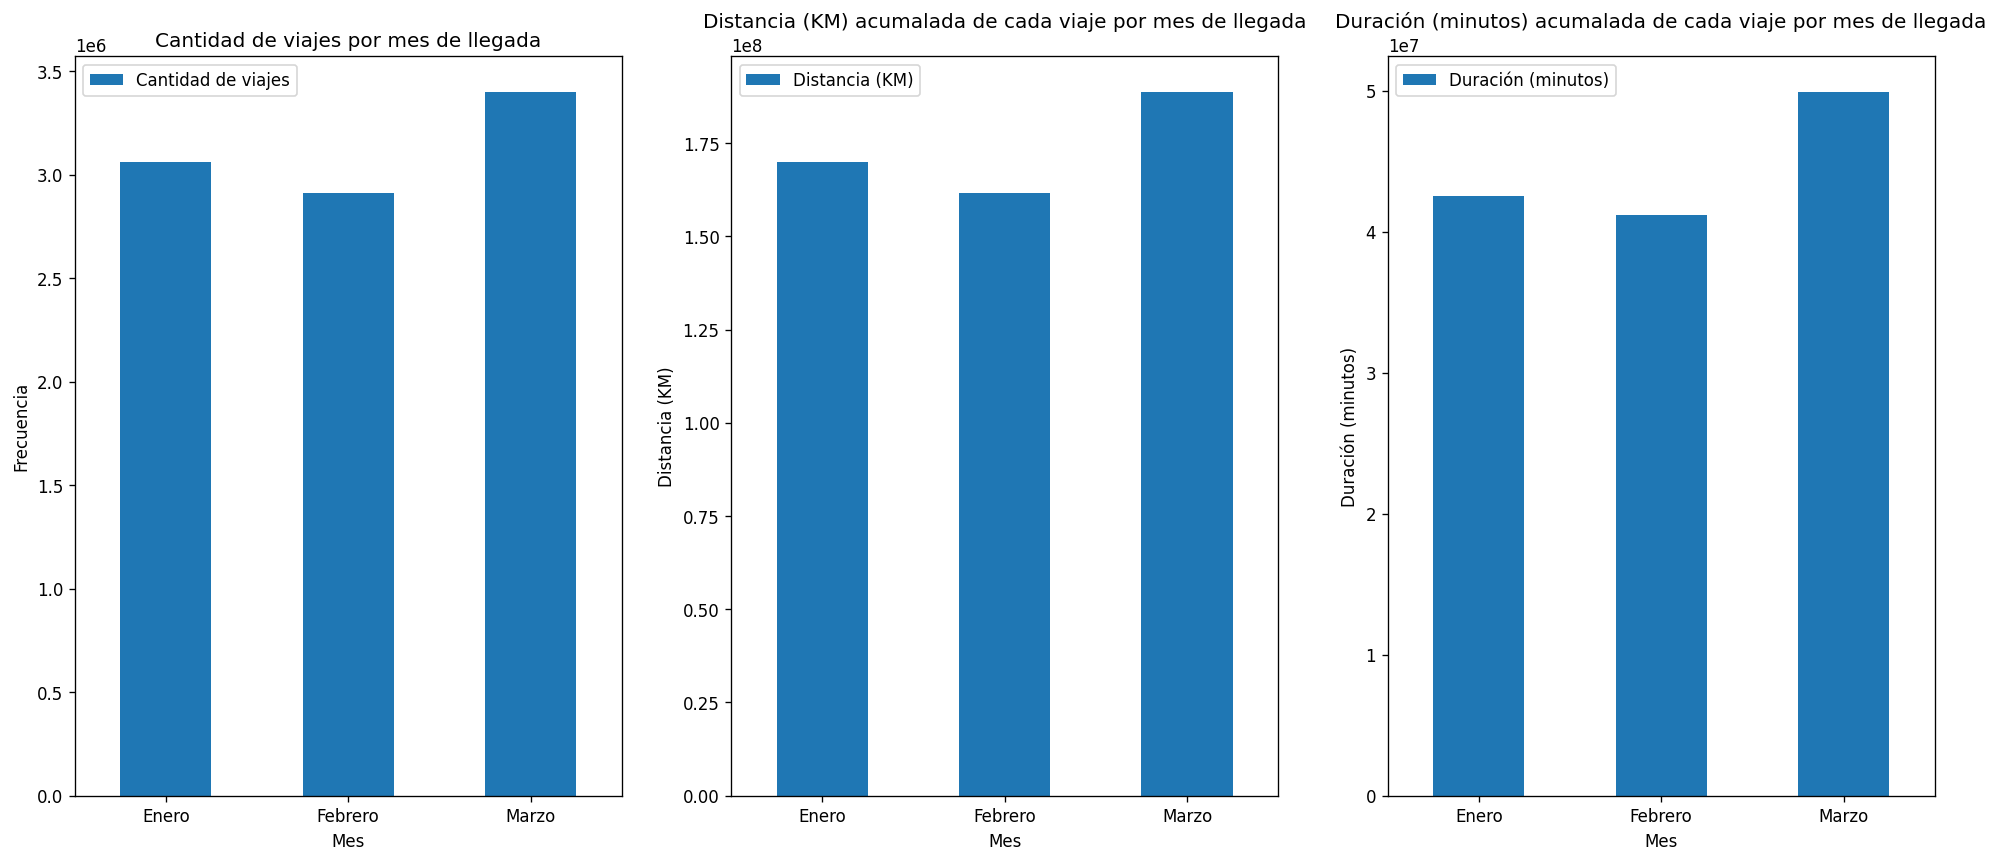

In [145]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[20,8], dpi=120, sharey=False)

trip_month_count = trip_data.loc[:, ['month','VendorID']]
trip_month_distance = trip_data.loc[:, ['month','trip_distance']]
trip_month_duration = trip_data.loc[:, ['month','duration_in_minutes']]

trip_month_count = trip_month_count.groupby(['month']).count().reset_index()
trip_month_count.rename({
    'VendorID': 'Cantidad de viajes'
}, inplace=True, axis=1)
trip_month_count.set_index('month', inplace=True)
trip_month_count.index.name = None

trip_month_distance = trip_month_distance.groupby(['month']).sum().reset_index()
trip_month_distance.rename({
    'trip_distance': 'Distancia (KM)'
}, inplace=True, axis=1)
trip_month_distance.set_index('month', inplace=True)
trip_month_distance.index.name = None

trip_month_duration = trip_month_duration.groupby(['month']).sum().reset_index()
trip_month_duration.rename({
    'duration_in_minutes': 'Duración (minutos)'
}, inplace=True, axis=1)
trip_month_duration.set_index('month', inplace=True)
trip_month_duration.index.name = None

trip_month_count.plot(y='Cantidad de viajes', ax=axes[0], kind='bar', figsize=(20, 8),rot=0)
axes[0].set_title("Cantidad de viajes por mes de llegada")
axes[0].set_ylabel("Frecuencia")
axes[0].set_xlabel("Mes")

trip_month_distance.plot(y='Distancia (KM)', ax=axes[1], kind='bar', figsize=(20, 8),rot=0)
axes[1].set_title("Distancia (KM) acumalada de cada viaje por mes de llegada")
axes[1].set_ylabel("Distancia (KM)")
axes[1].set_xlabel("Mes")

trip_month_duration.plot(y='Duración (minutos)', ax=axes[2], kind='bar', figsize=(20, 8),rot=0)
axes[2].set_title("Duración (minutos) acumalada de cada viaje por mes de llegada")
axes[2].set_ylabel("Duración (minutos)")
axes[2].set_xlabel("Mes")

plt.show()

Se puede apreciar que el mes con la mayor cantidad de viajes y con más distancia y duración acumulada es Marzo. Con una cantidad de 3,500,000 viajes acumuló una distancia de 175,000,000 KM y una duración de 50,000,000 minutos (como habíamos visto, un promedio de 14 minutos por viaje). \
Luego lo sigue Enero y por úlitmo Febrero con la menor cantidad y acumulación.

In [146]:
del trip_month_count
del trip_month_distance
del trip_month_duration
# Perform garbage collection
gc.collect()

5786

● ¿Cantidad de viajes por hora y día de la semana de llegada?

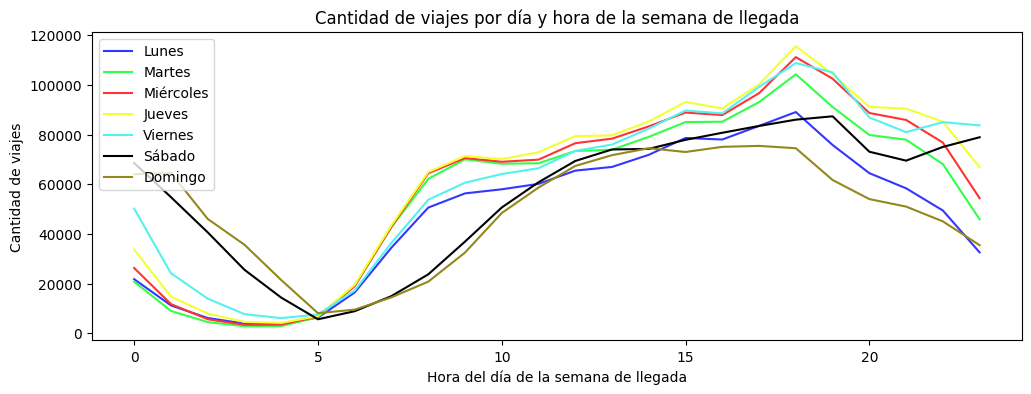

In [147]:
#cantidad de viajes por dia y hora de la semana de llegada
trip_weekday_hour = trip_data
trip_weekday_hour['hour'] = trip_weekday_hour['tpep_dropoff_datetime'].dt.hour
trip_weekday_hour = trip_weekday_hour.loc[:,['VendorID','weekday','hour']]

#separo por dia
trip_Monday = trip_weekday_hour[trip_weekday_hour.weekday == 'Lunes']
trip_Tuesday = trip_weekday_hour[trip_weekday_hour.weekday == 'Martes']
trip_Wednesday = trip_weekday_hour[trip_weekday_hour.weekday == 'Miércoles']
trip_Thursday = trip_weekday_hour[trip_weekday_hour.weekday == 'Jueves']
trip_Friday = trip_weekday_hour[trip_weekday_hour.weekday == 'Viernes']
trip_Saturday = trip_weekday_hour[trip_weekday_hour.weekday == 'Sábado']
trip_Sunday = trip_weekday_hour[trip_weekday_hour.weekday == 'Domingo']

#agrupo por hora por cada dia con la cantidad de viajes de llegada
trip_Monday = trip_Monday.groupby('hour', as_index=False)['VendorID'].count()
trip_Monday.columns = ['hour', 'Lunes']
trip_Tuesday = trip_Tuesday.groupby('hour', as_index=False)['VendorID'].count()
trip_Tuesday.columns = ['hour', 'Martes']
trip_Wednesday = trip_Wednesday.groupby('hour', as_index=False)['VendorID'].count()
trip_Wednesday.columns = ['hour', 'Miércoles']
trip_Thursday = trip_Thursday.groupby('hour', as_index=False)['VendorID'].count()
trip_Thursday.columns = ['hour', 'Jueves']
trip_Friday = trip_Friday.groupby('hour', as_index=False)['VendorID'].count()
trip_Friday.columns = ['hour', 'Viernes']
trip_Saturday = trip_Saturday.groupby('hour', as_index=False)['VendorID'].count()
trip_Saturday.columns = ['hour', 'Sábado']
trip_Sunday = trip_Sunday.groupby('hour', as_index=False)['VendorID'].count()
trip_Sunday.columns = ['hour', 'Domingo']

#junto los dias
trip_weekday_hour = pd.merge(trip_Monday, trip_Tuesday, on='hour', how="left")
trip_weekday_hour = pd.merge(trip_weekday_hour, trip_Wednesday, on='hour', how="left")
trip_weekday_hour = pd.merge(trip_weekday_hour, trip_Thursday, on='hour', how="left")
trip_weekday_hour = pd.merge(trip_weekday_hour, trip_Friday, on='hour', how="left")
trip_weekday_hour = pd.merge(trip_weekday_hour, trip_Saturday, on='hour', how="left")
trip_weekday_hour = pd.merge(trip_weekday_hour, trip_Sunday, on='hour', how="left")

trip_weekday_hour.plot(x='hour', title="Cantidad de viajes por día y hora de la semana de llegada", figsize=(12,4),
            color=['#3336FF','#33FF49','#FF3333','#F3FF33','#55F1F1','#000000','#93881A'])
plt.xlabel('Hora del día de la semana de llegada')
plt.ylabel('Cantidad de viajes')
plt.show()

Se puede apreciar que para todos los días, la hora donde hay más viajes es entre las 18 y 19 hs, y las 5hs hay la menor cantidad de viajes. Respecto a los días,Jueves es el que mayor pico tiene, seguido de Miércoles y Viernes, respectivamente. A la madrugada, entre las 00 y 5hs, los fin de semanas son los que tienen mayor cantidad de viajes.

In [148]:
del trip_weekday_hour
del trip_Monday
del trip_Tuesday
del trip_Wednesday
del trip_Thursday
del trip_Friday
del trip_Saturday
del trip_Sunday
# Perform garbage collection
gc.collect()

4177

● ¿Cómo es la distribución de los viajes por tipo de pago, respecto del día de la semana de llegada?

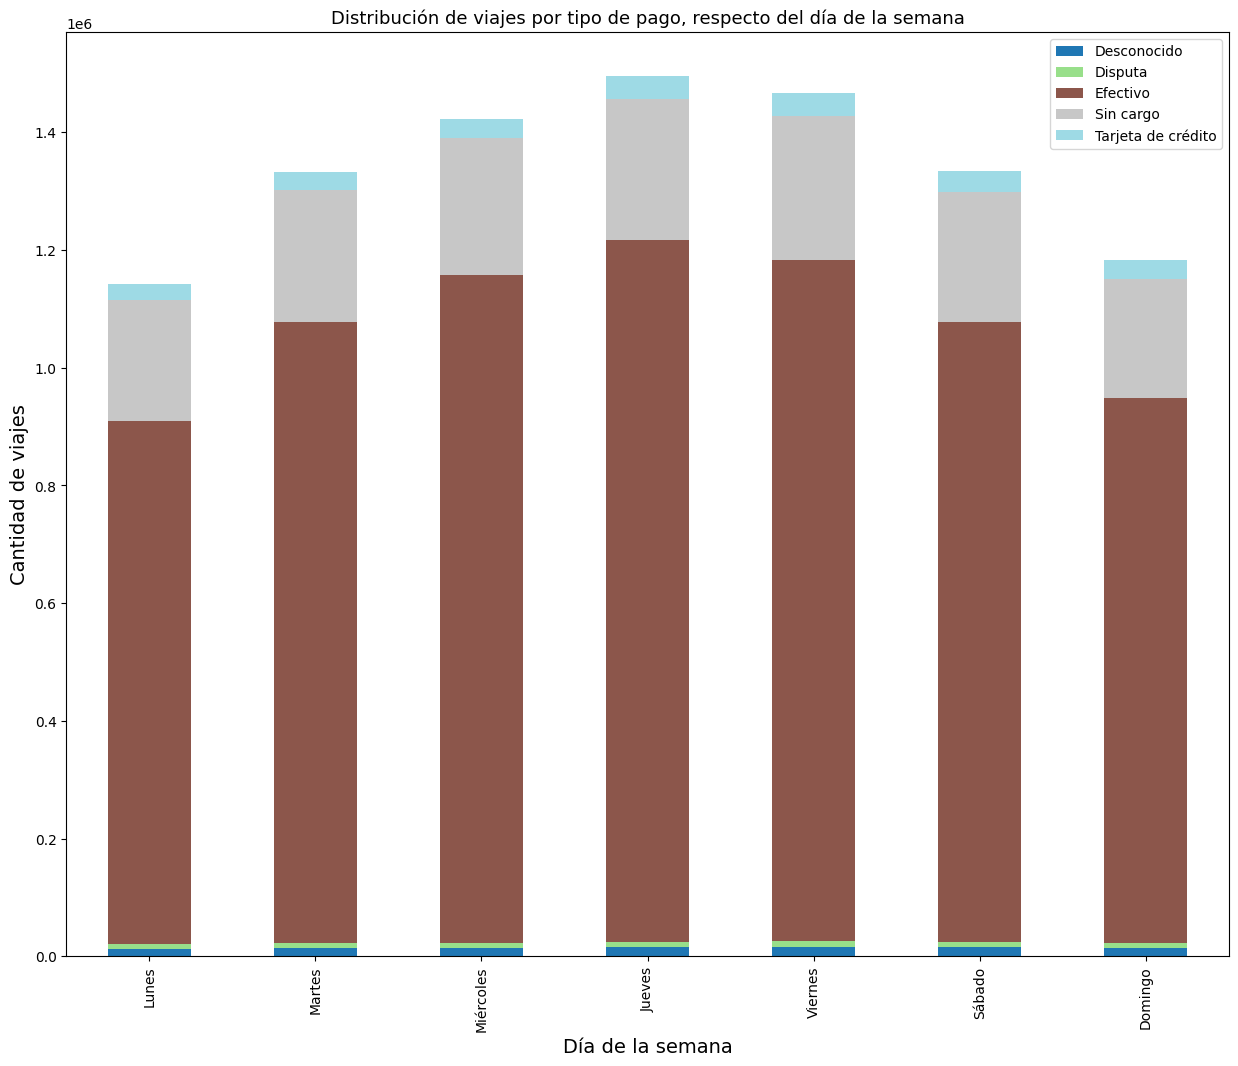

In [149]:
index = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
days_count_bar = trip_data.loc[:, ['VendorID', 'weekday', 'payment_type_name']]
days_count_bar = days_count_bar.groupby(['weekday','payment_type_name']).count().unstack()
days_count_bar = days_count_bar.reindex(index)
days_count_bar = days_count_bar.plot(kind='bar',stacked=True, colormap='tab20', figsize=(15,12))
days_count_bar.set_title('Distribución de viajes por tipo de pago, respecto del día de la semana', size=13)
days_count_bar.set_ylabel('Cantidad de viajes', size=14)
days_count_bar.set_xlabel('Día de la semana', size=14)
days_count_bar.legend(['Desconocido','Disputa', 'Efectivo', 'Sin cargo', 'Tarjeta de crédito'])
plt.show()

Se puede apreciar que el tipo de pago "Efectivo" es el más utilizado en los 7 días de la semana. Como ya vimos, el Jueves es el que tiene mayor cantidad de viajes, igualmente la distribución de los tipos de pagos son muy similares entre los días.

In [150]:
del days_count_bar
# Perform garbage collection
gc.collect()

5417

● ¿Cómo son los viajes por el proveedor de TPEP que proporcionó el registro y tipo de pago?

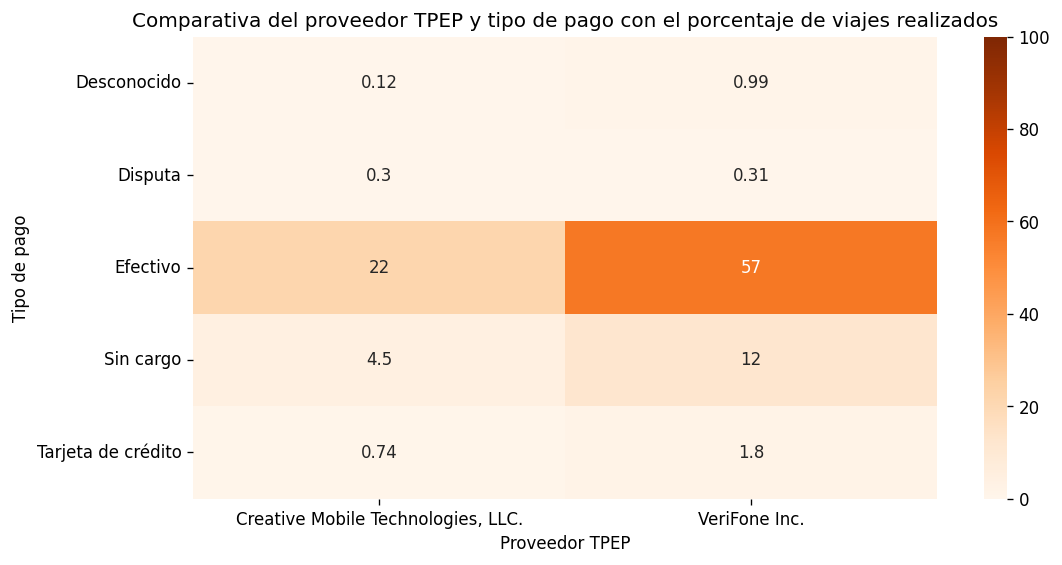

In [151]:
vendor_payment_df = trip_data.loc[:,['VendorID', 'vendor_description', 'payment_type_name']]

vendor_payment_df_gb = vendor_payment_df.groupby(['vendor_description', 'payment_type_name']).count().reset_index()

vendor_payment_df_gb.rename({
    'vendor_description': 'Proveedor TPEP',
    'payment_type_name': 'Tipo de pago',
    'VendorID': 'Porcentaje'
}, inplace=True, axis=1)

vendor_payment_df_gb['Porcentaje'] = (vendor_payment_df_gb['Porcentaje'] / vendor_payment_df_gb['Porcentaje'].sum()) * 100

vendor_payment_df = pd.pivot_table(vendor_payment_df_gb, values='Porcentaje', columns='Proveedor TPEP', index='Tipo de pago')
vendor_payment_df = vendor_payment_df.fillna(0)

fig, ax = plt.subplots(figsize=(10,5), dpi=120)       
sns.heatmap(vendor_payment_df, cmap='Oranges', ax=ax, vmin=0, vmax=100, annot=True)
ax.set_title('Comparativa del proveedor TPEP y tipo de pago con el porcentaje de viajes realizados');

In [152]:
del vendor_payment_df
del vendor_payment_df_gb
# Perform garbage collection
gc.collect()

21739

● ¿Cuál es el flujo del importe total según el tipo de pago en el transcurso del día de la semana?

/tmp/ipykernel_125994/2242678462.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  payment_type_amount_plt.set_xticklabels(payment_type_amount_plt.get_xticklabels(), rotation=90)


[Text(0, 0, 'Lunes'),
 Text(1, 0, 'Martes'),
 Text(2, 0, 'Miércoles'),
 Text(3, 0, 'Jueves'),
 Text(4, 0, 'Viernes'),
 Text(5, 0, 'Sábado'),
 Text(6, 0, 'Domingo')]

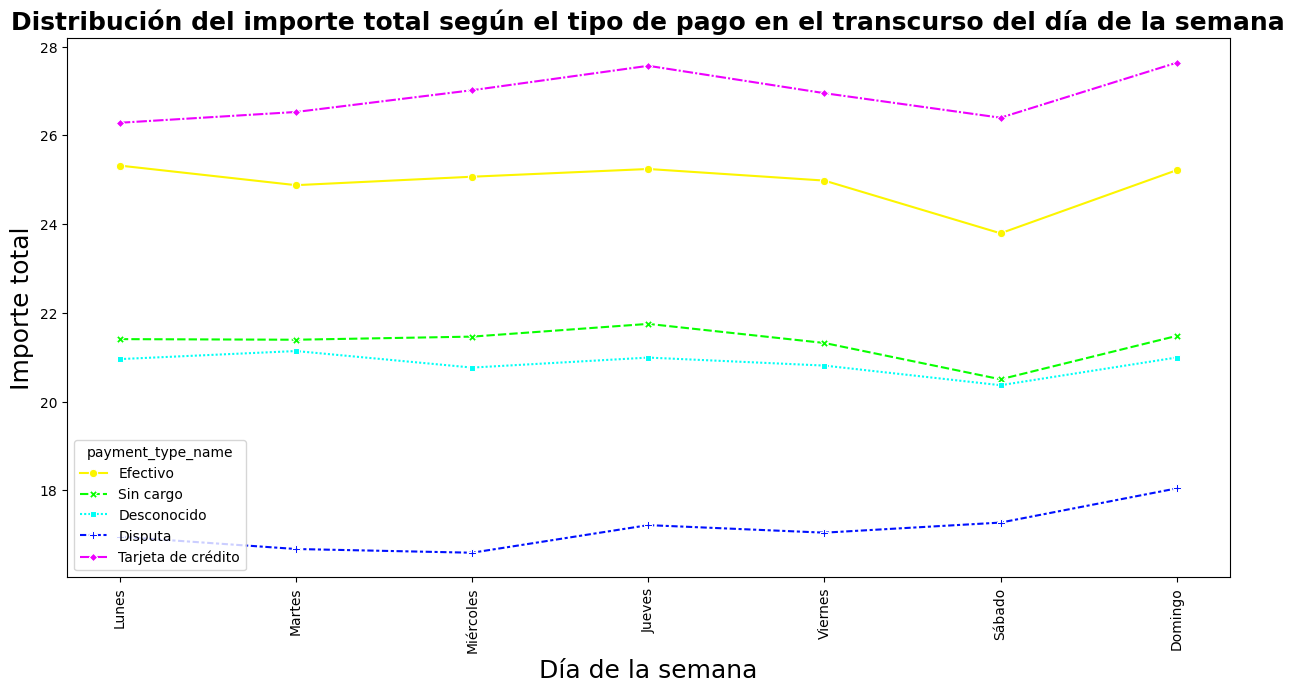

In [163]:
plt.figure(figsize=(15, 7))

payment_type_amount_plt = trip_data.sort_values('dayofweek')

payment_type_amount_plt = sns.lineplot(data=payment_type_amount_plt, x='weekday', y='total_amount', hue='payment_type_name', errorbar=None, style = 'payment_type_name', markers=True, palette=(sns.color_palette("hsv", n_colors=5)))

payment_type_amount_plt.set_title('Distribución del importe total según el tipo de pago en el transcurso del día de la semana', fontsize=18, fontweight = 'heavy')
payment_type_amount_plt.set_xlabel('Día de la semana', fontsize=18)
payment_type_amount_plt.set_ylabel('Importe total', fontsize=18)
payment_type_amount_plt.set_xticklabels(payment_type_amount_plt.get_xticklabels(), rotation=90)

Se puede apreciar que los días donde hay más viajes (Jueves) el importe total con "Efectivo" es un poco más elevado. Se mantiene parejo, excepto los Sábados que son más baratos.\
Respecto a los pagos con "Tarjeta de crédito" son un poco más caros, seguramente por el impuesto agregado.

In [164]:
del payment_type_amount_plt
# Perform garbage collection
gc.collect()

212

● ¿Cuál es el flujo del importe total según la cantidad de pasajeros en el transcurso del día de la semana?

/tmp/ipykernel_125994/2111610381.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  payment_type_passenger_plt.set_xticklabels(payment_type_passenger_plt.get_xticklabels(), rotation=90)


[Text(0, 0, 'Lunes'),
 Text(1, 0, 'Martes'),
 Text(2, 0, 'Miércoles'),
 Text(3, 0, 'Jueves'),
 Text(4, 0, 'Viernes'),
 Text(5, 0, 'Sábado'),
 Text(6, 0, 'Domingo')]

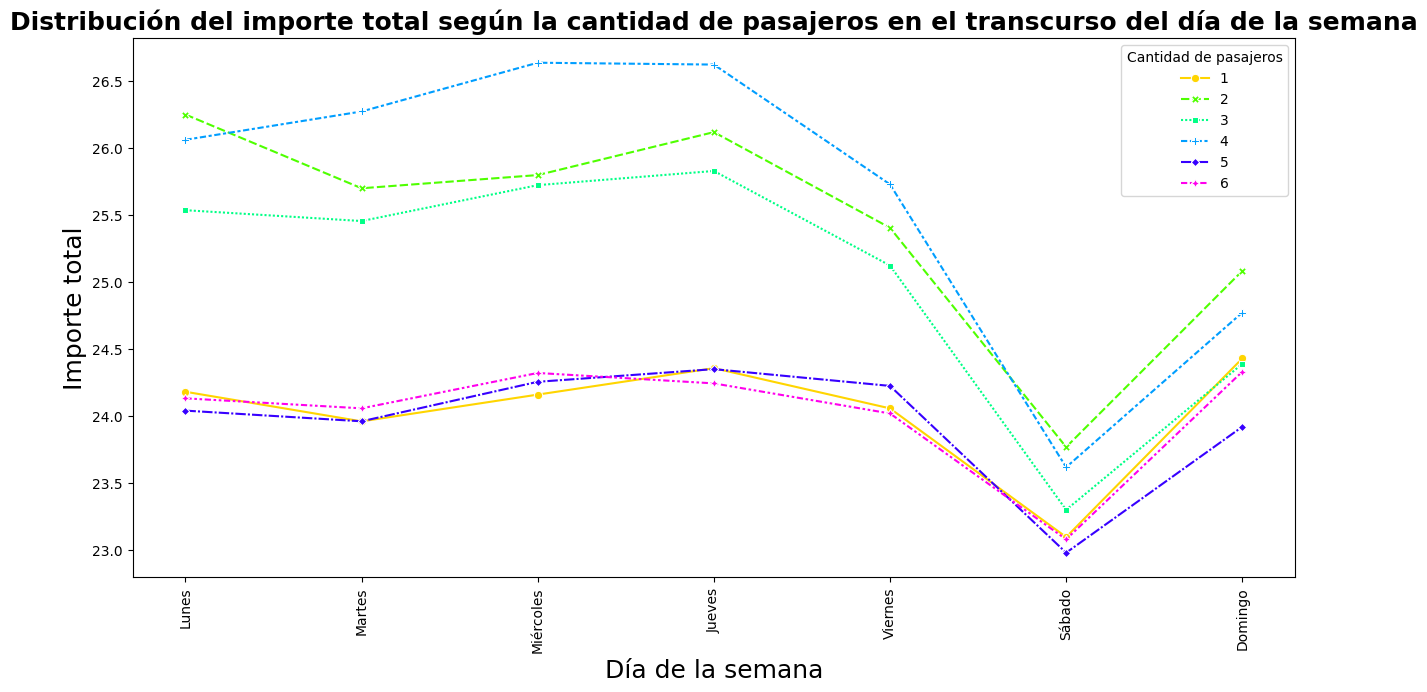

In [165]:
plt.figure(figsize=(15, 7))

payment_type_passenger_plt = trip_data.sort_values('dayofweek')
payment_type_passenger_plt.rename({
    'passenger_count': 'Cantidad de pasajeros'
}, inplace=True, axis=1)

payment_type_passenger_plt = sns.lineplot(data=payment_type_passenger_plt, x='weekday', y='total_amount', hue='Cantidad de pasajeros', errorbar=None, style = 'Cantidad de pasajeros', markers=True, palette=(sns.color_palette("hsv", n_colors=6)))

payment_type_passenger_plt.set_title('Distribución del importe total según la cantidad de pasajeros en el transcurso del día de la semana', fontsize=18, fontweight = 'heavy')
payment_type_passenger_plt.set_xlabel('Día de la semana', fontsize=18)
payment_type_passenger_plt.set_ylabel('Importe total', fontsize=18)
payment_type_passenger_plt.set_xticklabels(payment_type_passenger_plt.get_xticklabels(), rotation=90)

Se puede apreciar que los días donde hay más viajes (Jueves) el importe total es más elevado con 4 pasajeros por viaje. Se mantiene parejo, excepto los Sábados que son más baratos.\
Respecto a la cantidad de pasajeros, los importes más altos son cuando hay 4,2 y 3 pasajeros por viaje.

In [166]:
del payment_type_passenger_plt
# Perform garbage collection
gc.collect()

235